In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import csv
from implementations import *
%load_ext autoreload
%autoreload 2

## data preperation

### file opening

In [3]:
File_test = open('test.csv')
File_train = open('train.csv')

data_test = np.array(list(csv.reader(File_test)))
data_train = np.array(list(csv.reader(File_train)))

File_test.close()
File_train.close()

### features 

In [4]:
def make_features(X):
    # converting -999. to nan to use np.nanmean and np.nanstd
    X = np.where(X == -999., np.nan, X)
    # standardizing the data Xd = (X_d - E[X_d])/(std(X_d))
    X, means, stds = standardize(X)
    # since data is standirdized, the mean is more or less 0 for each feature so replacing by zero is reasonable and helps computations
    X = np.where(np.isnan(X), 0, X)
    # adding the 1 padding
    return np.column_stack((np.ones(X.shape[0]), X))

# converting the strings into floats and removing features names, labels and indexes
X = np.array(data_train[1:,2:]).astype(np.float)

num_train = 150000
num_val = 50000
num_test = 50000
N = X.shape[0]
assert num_train + num_val + num_test == N

training_set = make_features(X[:num_train])
validation_set = make_features(X[num_train:num_train+num_val])
test_set = make_features(X[-num_test:])

In [5]:
print(training_set.shape)
print(validation_set.shape)
print(test_set.shape)

(150000, 31)
(50000, 31)
(50000, 31)


### labels

In [11]:
def make_labels(data):
    labels = np.array(data[1:,1])
    return np.where(labels == 'b', 1, 0)
    
training_labels = make_labels(data_train[:num_train+1])
validation_labels = make_labels(data_train[num_train:num_train+num_val+1])
test_labels = make_labels(data_train[-num_test-1:])

In [12]:
print(training_labels.shape)
print(validation_labels.shape)
print(test_labels.shape)

(150000,)
(50000,)
(50000,)


### test on features

In [53]:
N = 50
sample_features = training_set[:N, :]
sample_labels = training_labels[:N]
D = sample_features.shape[1]
features_name = data_test[0,:]
features_name

array(['Id', 'Prediction', 'DER_mass_MMC', 'DER_mass_transverse_met_lep',
       'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet',
       'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep',
       'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau',
       'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_tau_pt',
       'PRI_tau_eta', 'PRI_tau_phi', 'PRI_lep_pt', 'PRI_lep_eta',
       'PRI_lep_phi', 'PRI_met', 'PRI_met_phi', 'PRI_met_sumet',
       'PRI_jet_num', 'PRI_jet_leading_pt', 'PRI_jet_leading_eta',
       'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi',
       'PRI_jet_all_pt'], dtype='<U27')

<Figure size 432x288 with 0 Axes>

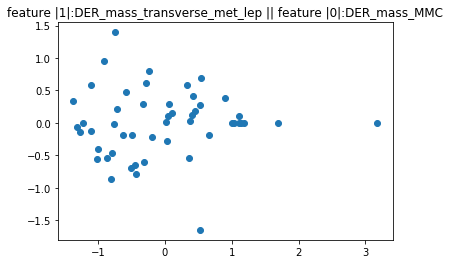

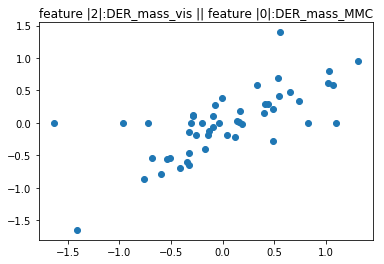

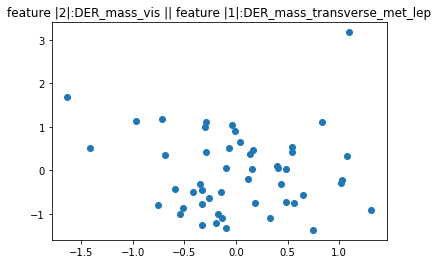

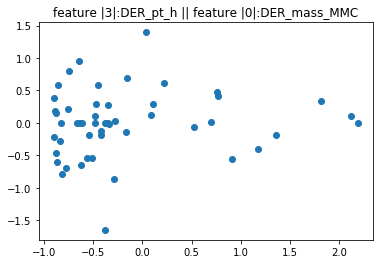

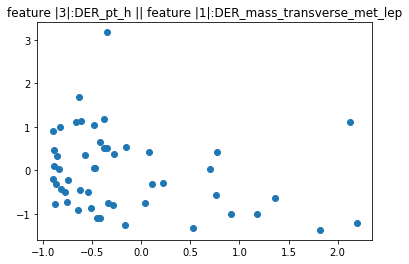

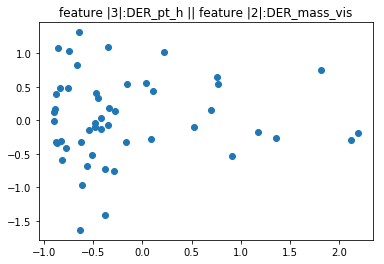

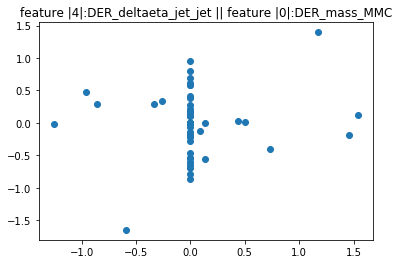

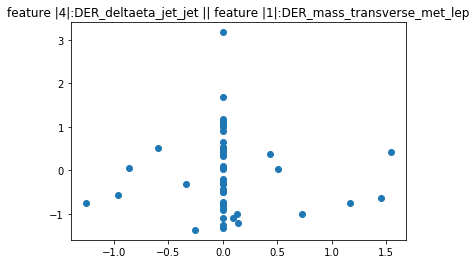

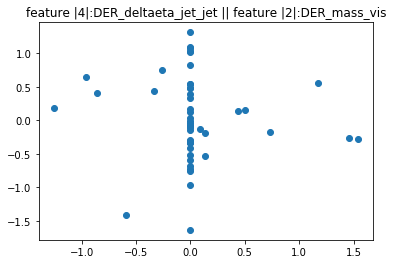

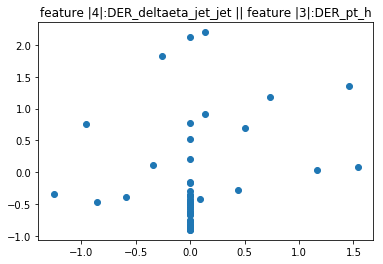

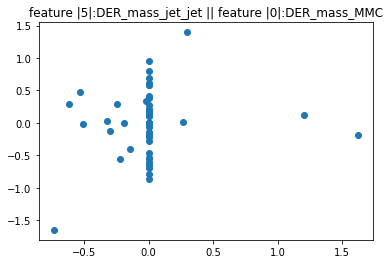

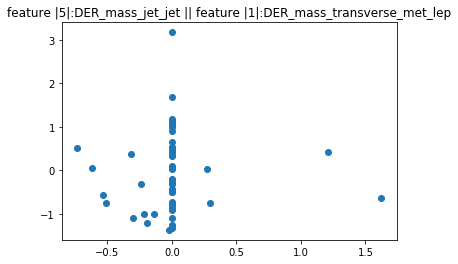

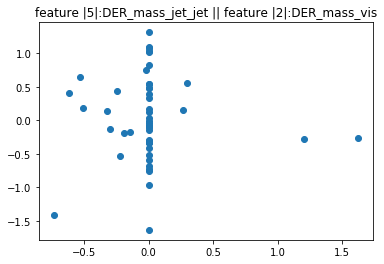

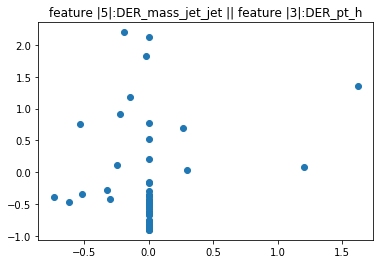

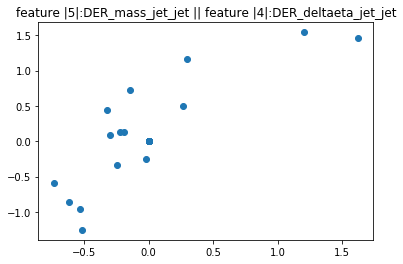

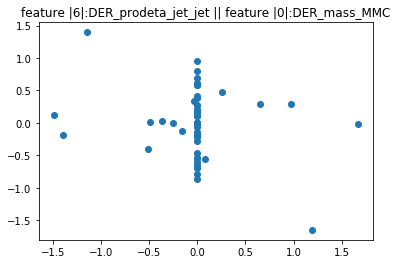

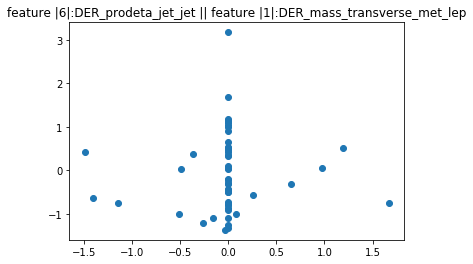

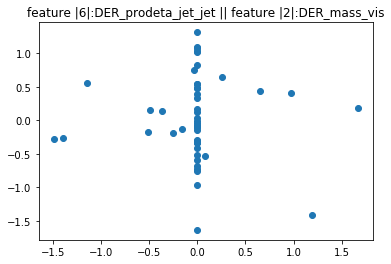

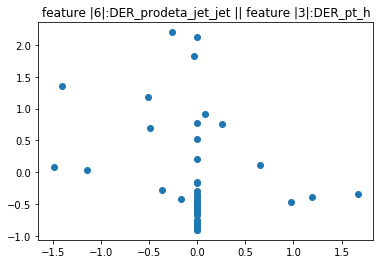

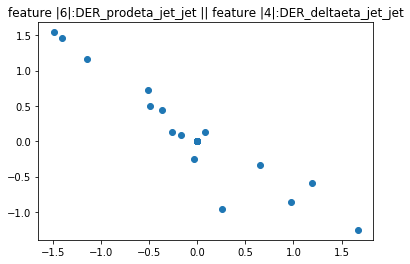

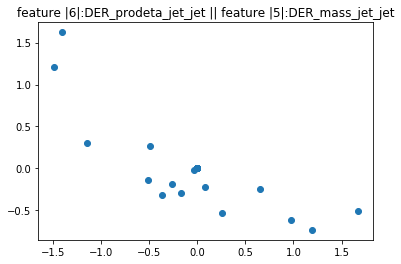

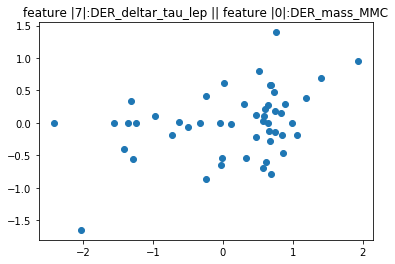

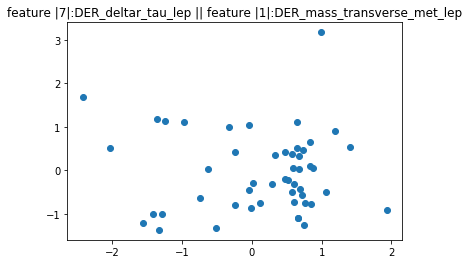

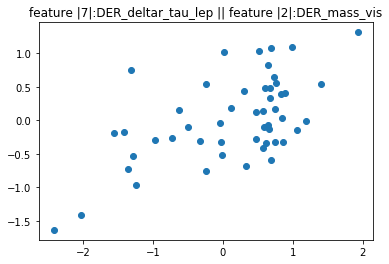

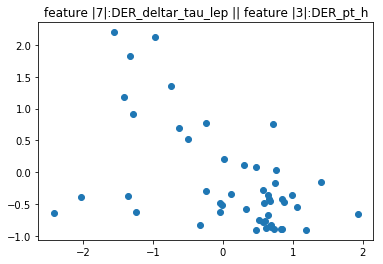

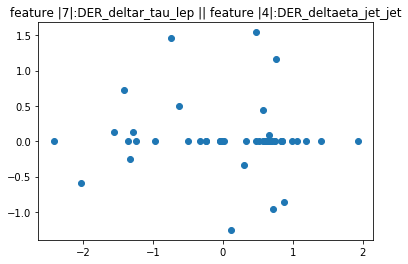

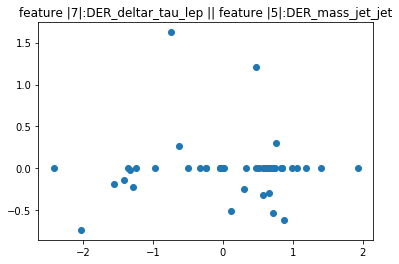

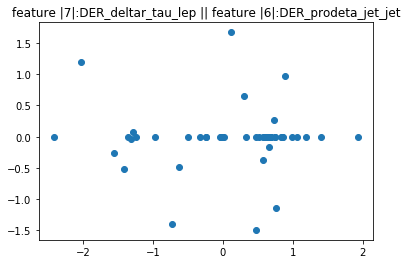

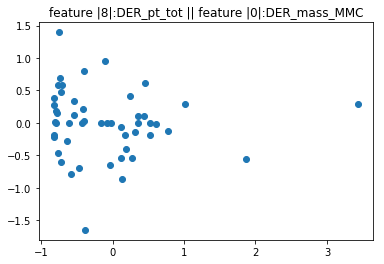

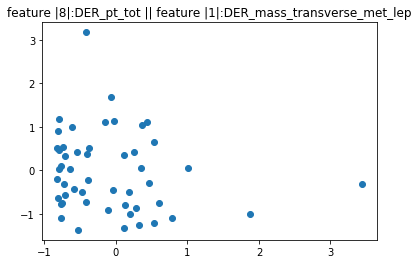

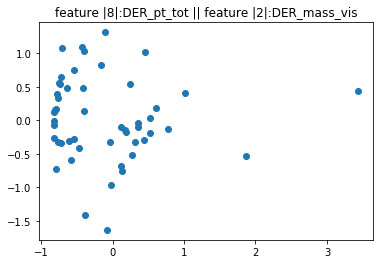

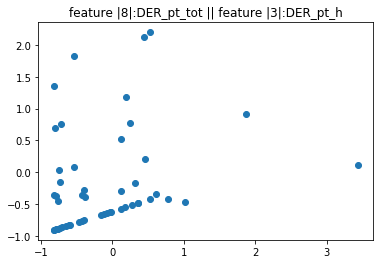

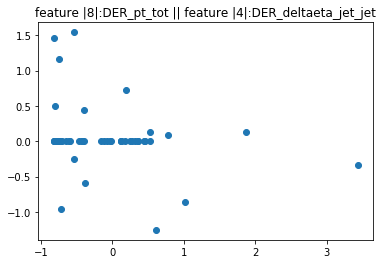

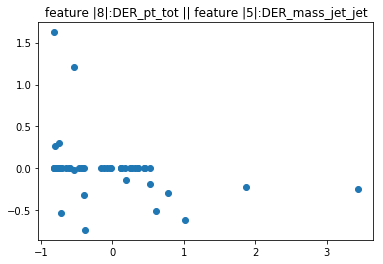

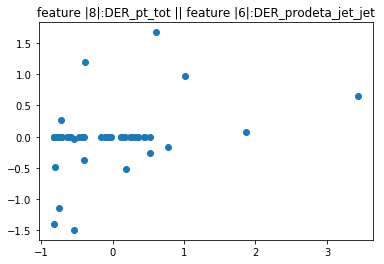

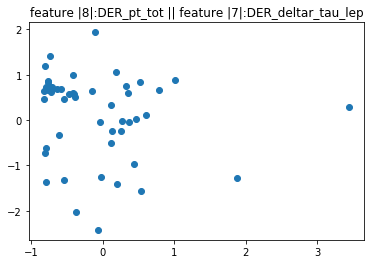

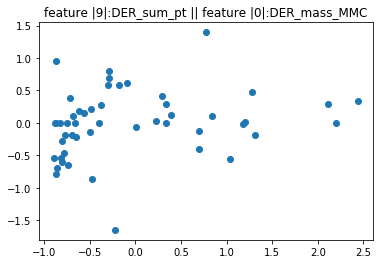

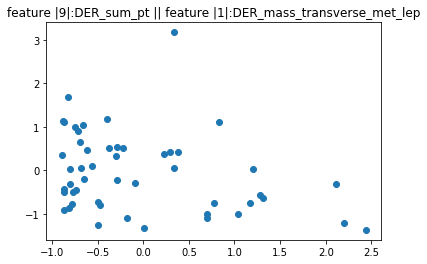

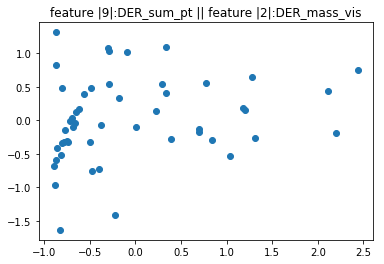

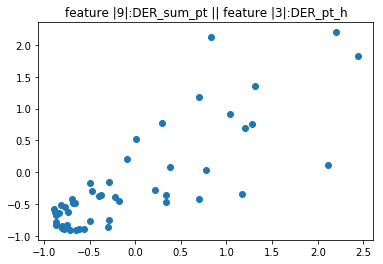

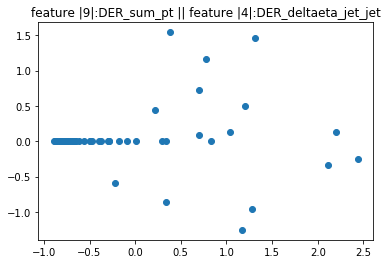

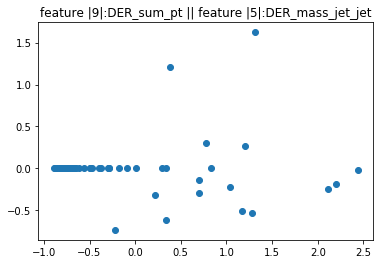

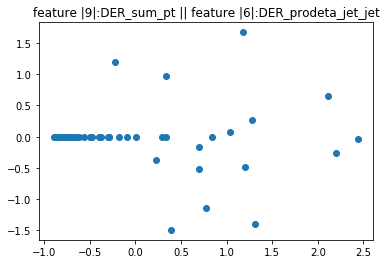

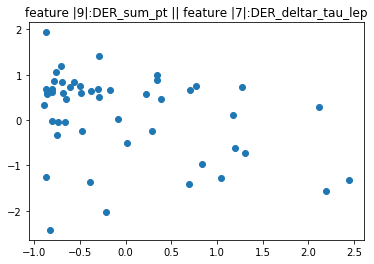

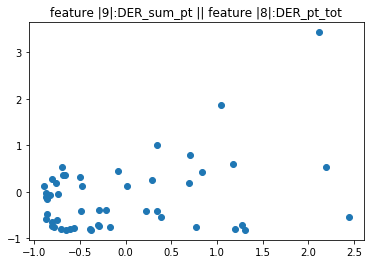

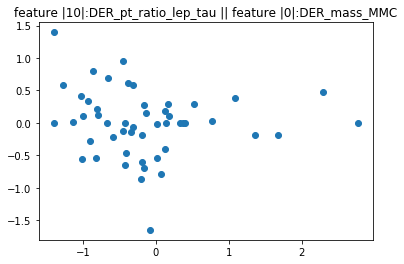

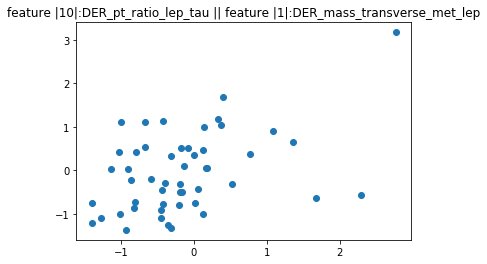

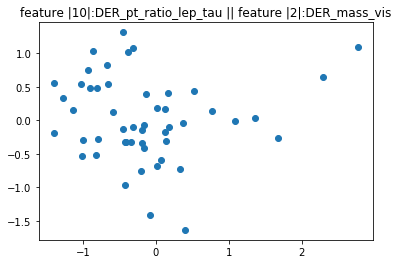

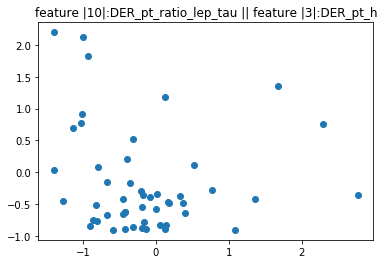

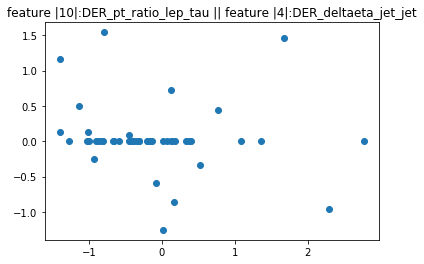

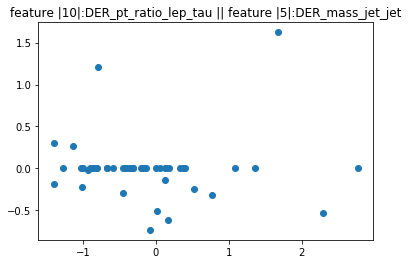

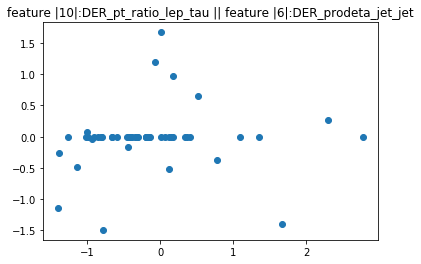

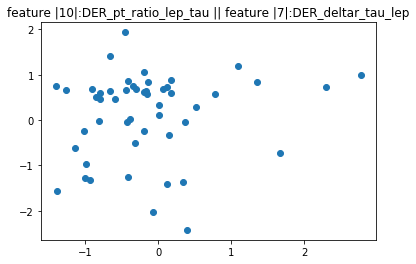

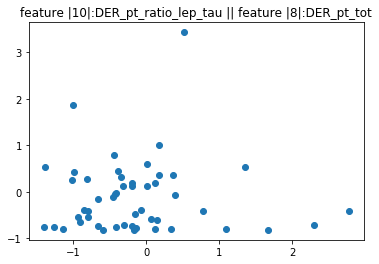

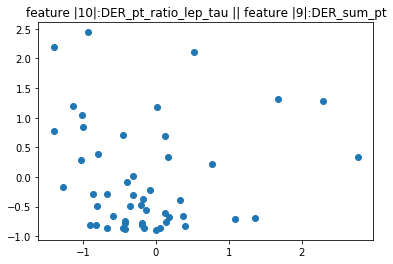

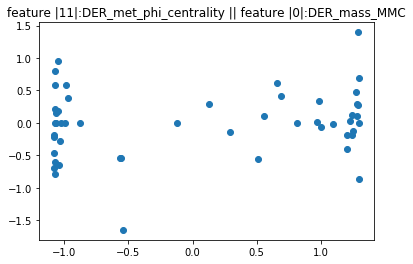

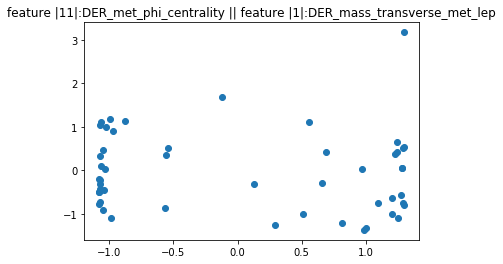

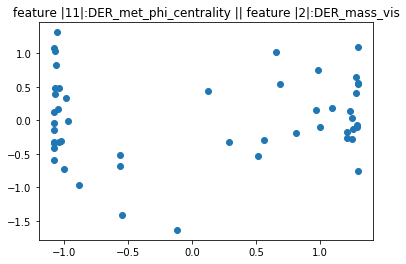

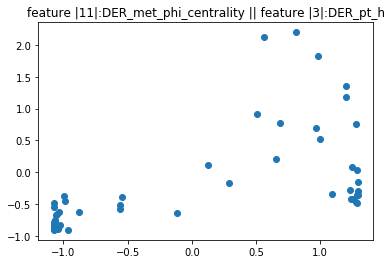

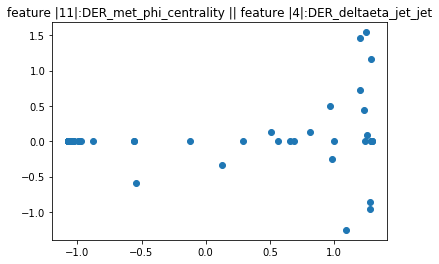

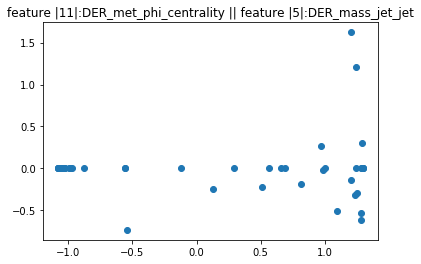

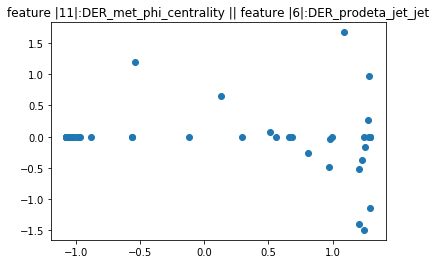

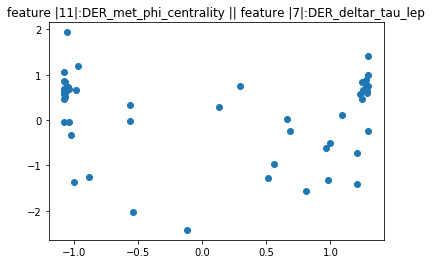

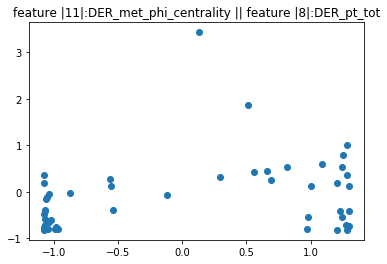

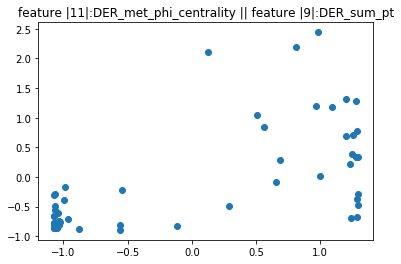

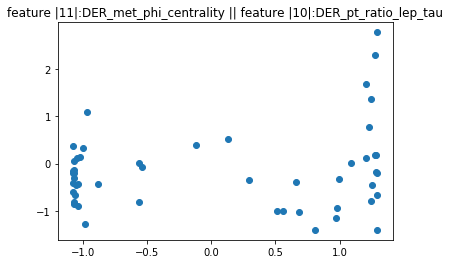

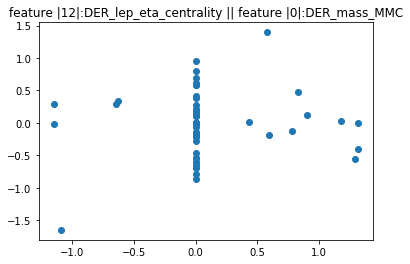

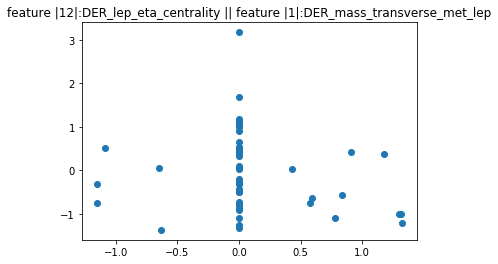

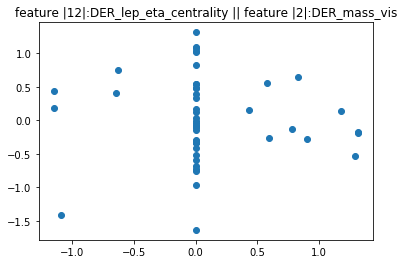

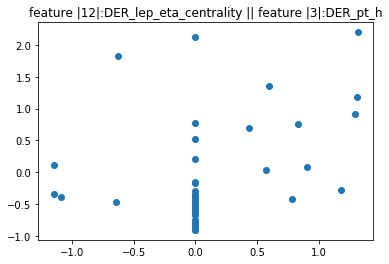

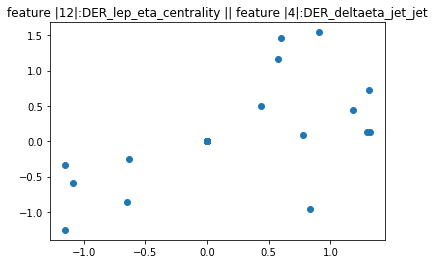

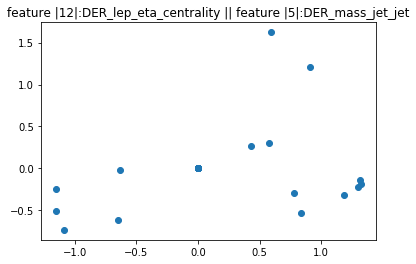

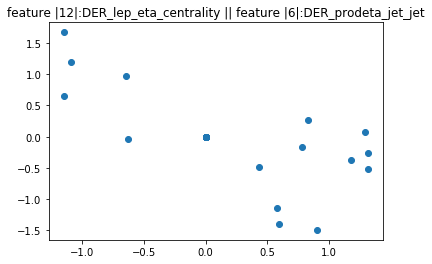

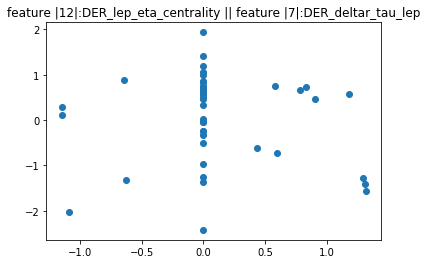

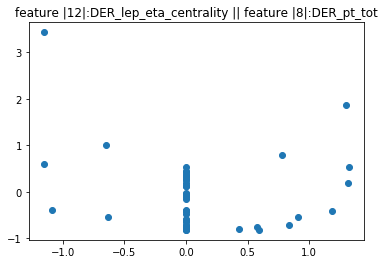

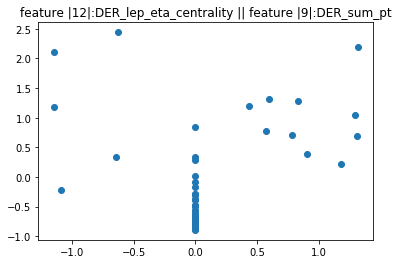

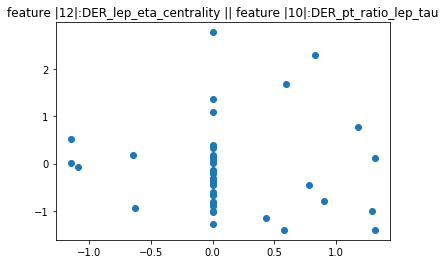

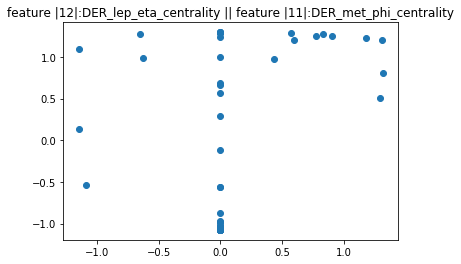

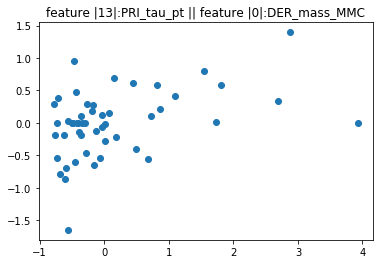

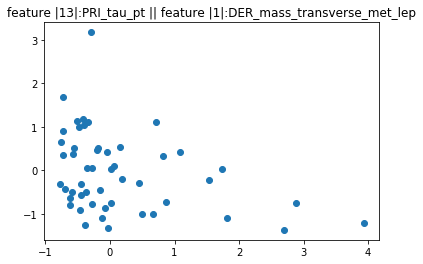

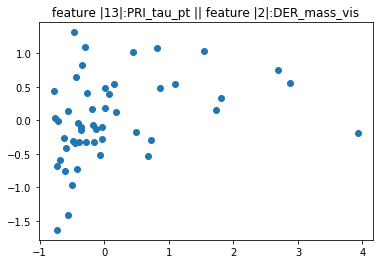

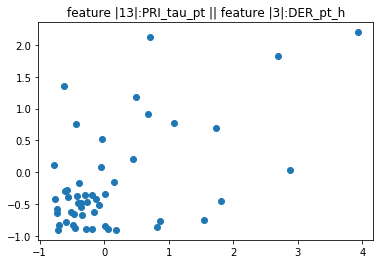

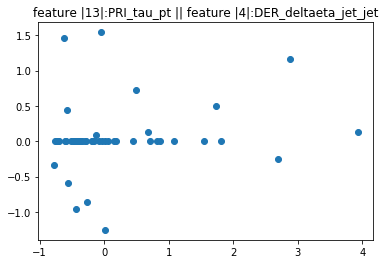

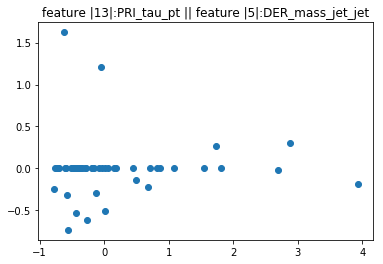

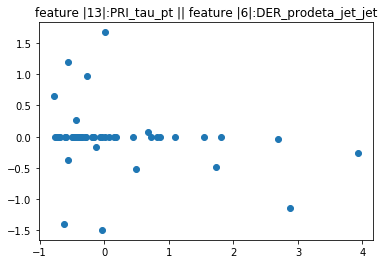

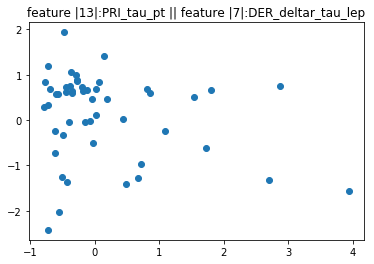

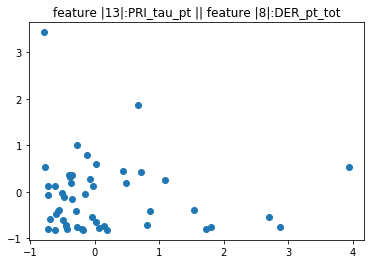

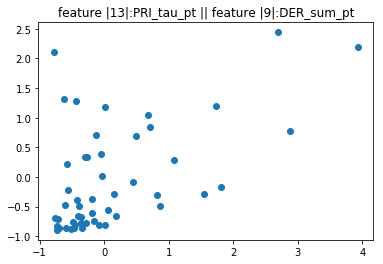

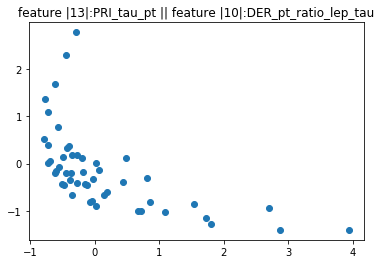

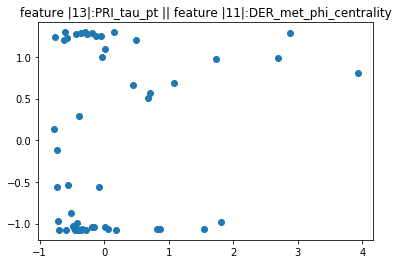

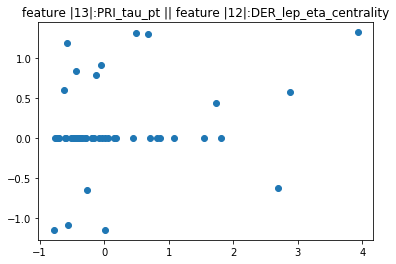

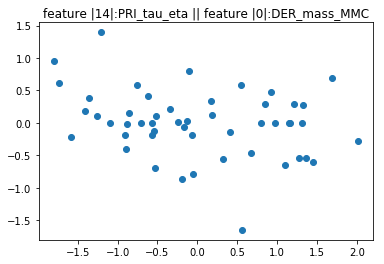

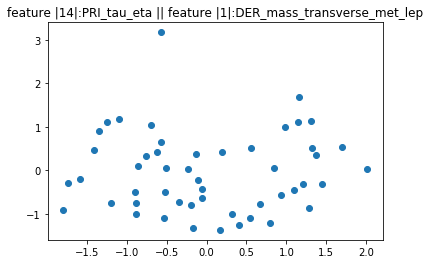

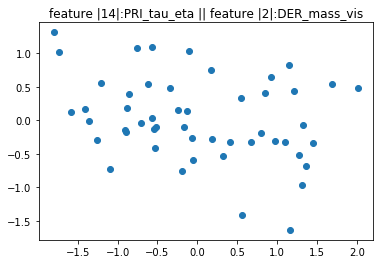

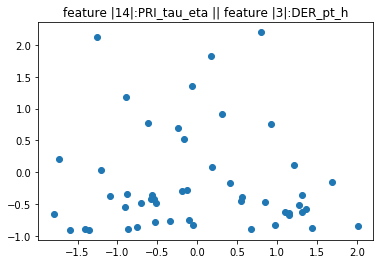

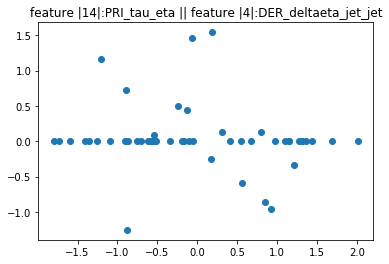

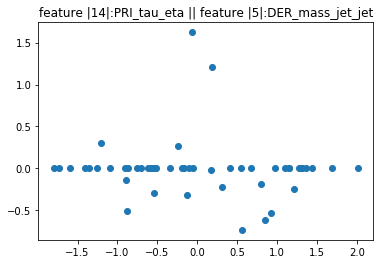

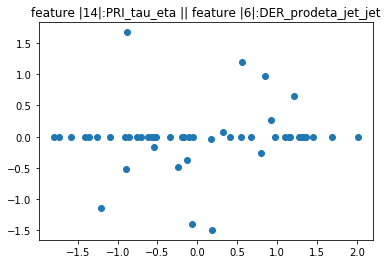

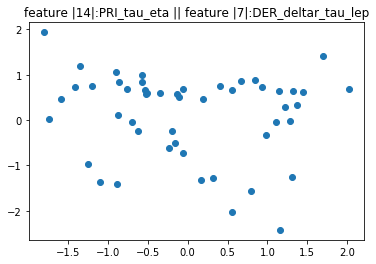

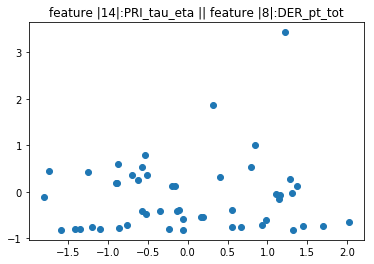

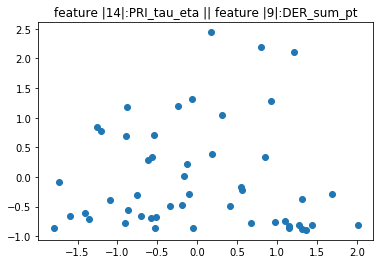

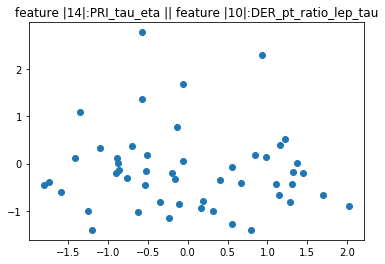

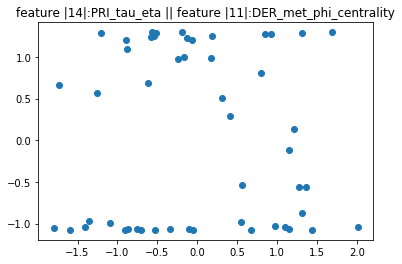

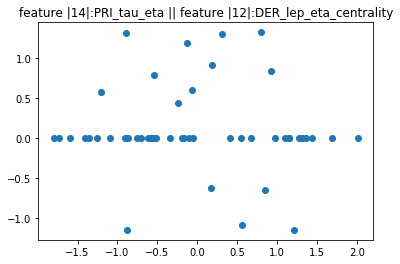

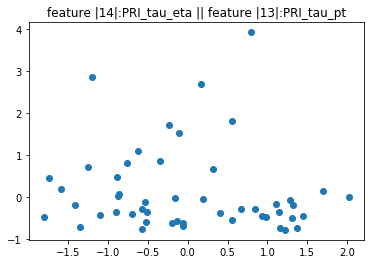

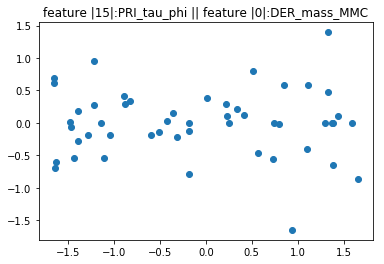

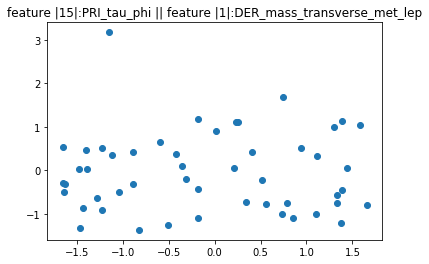

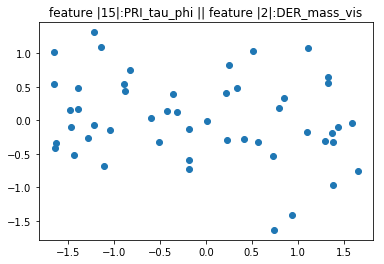

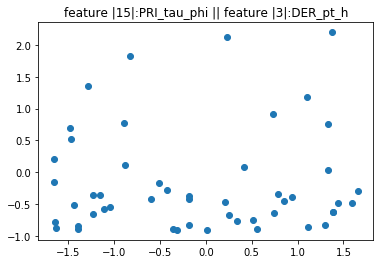

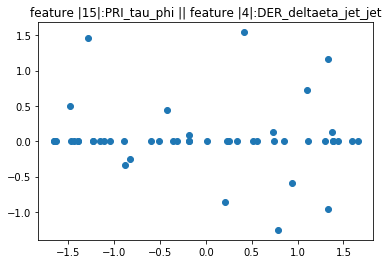

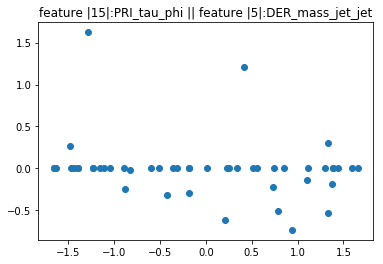

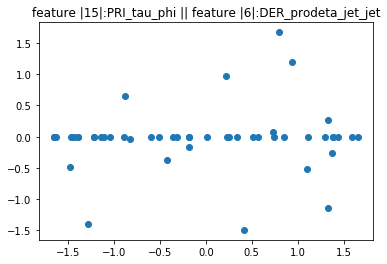

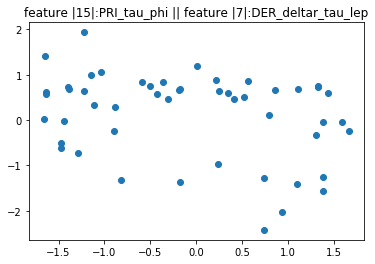

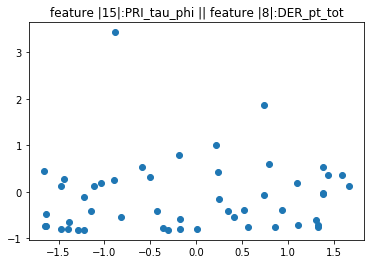

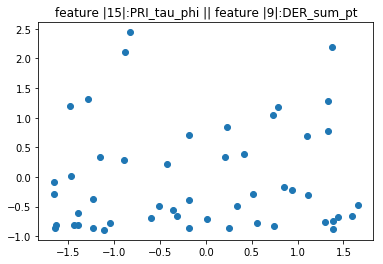

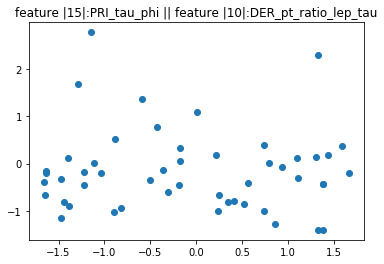

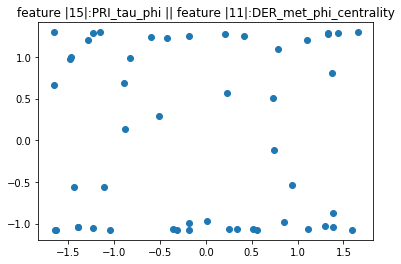

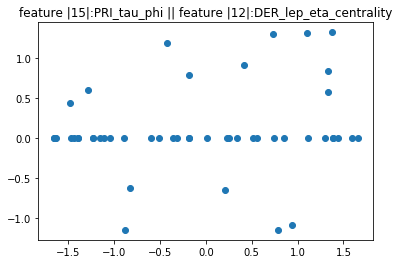

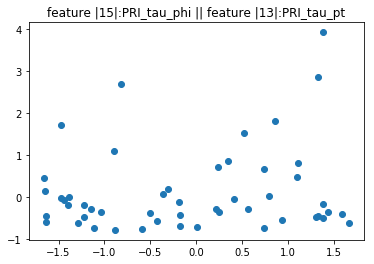

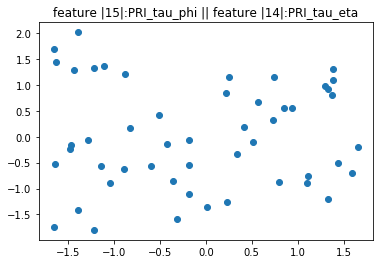

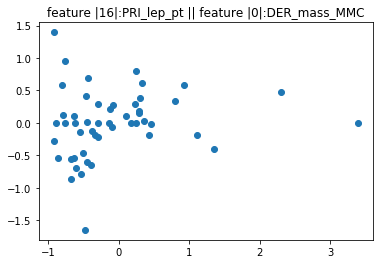

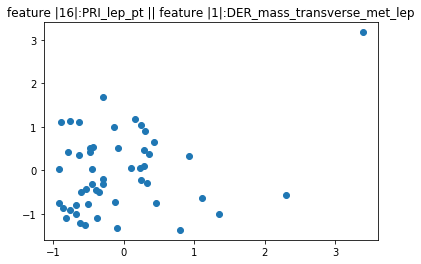

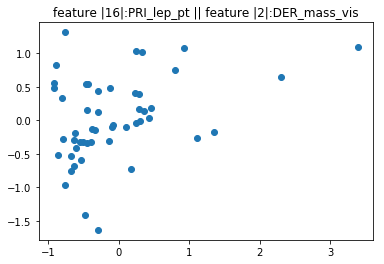

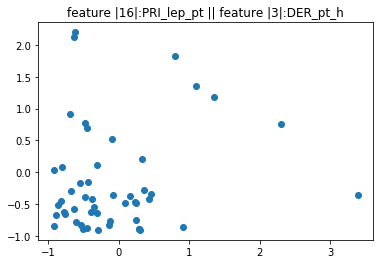

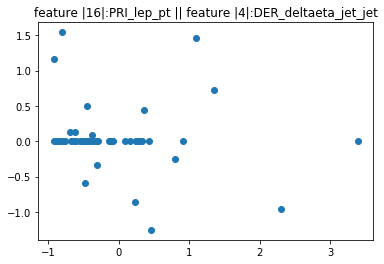

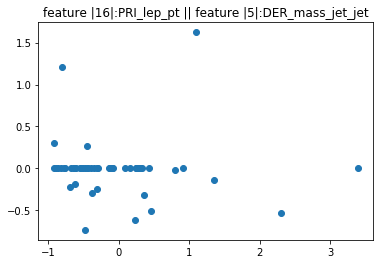

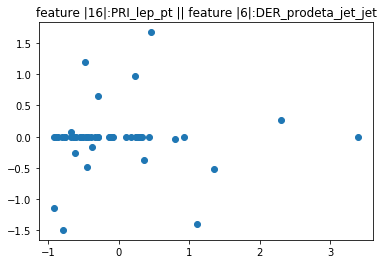

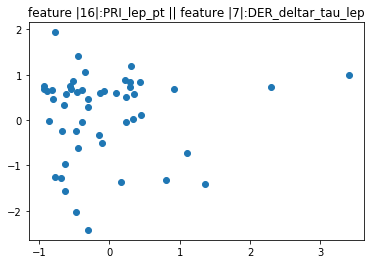

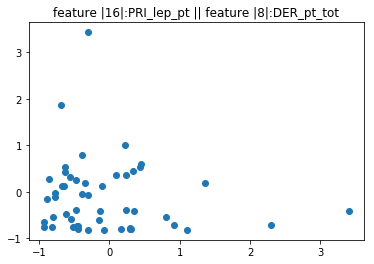

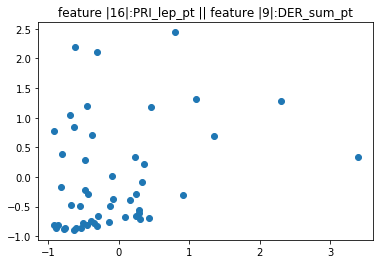

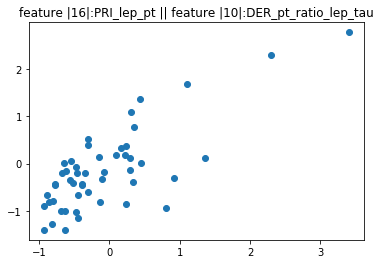

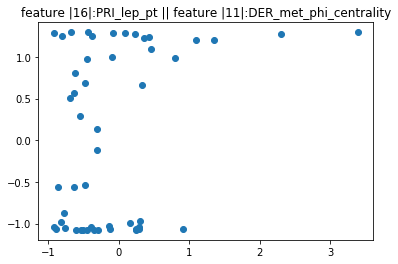

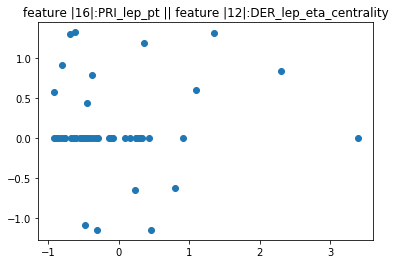

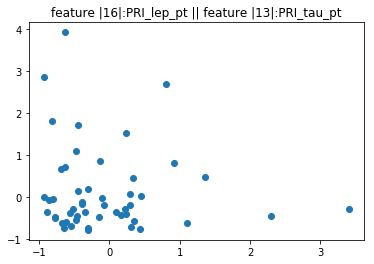

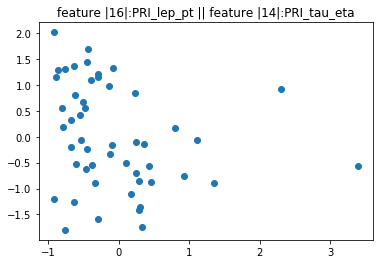

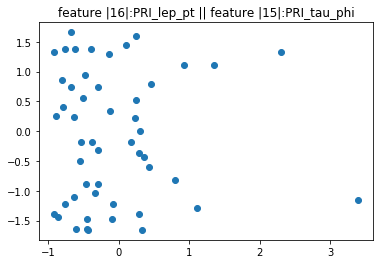

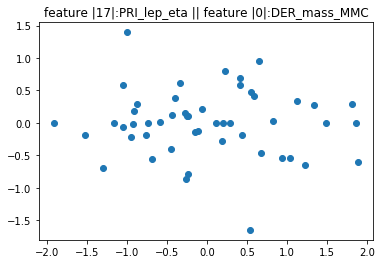

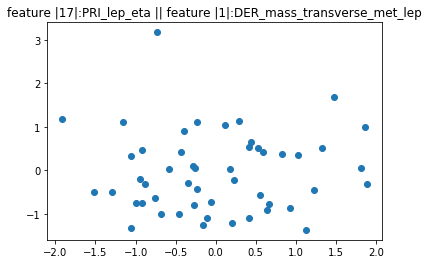

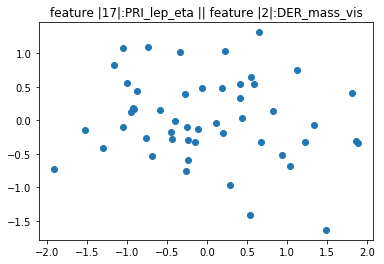

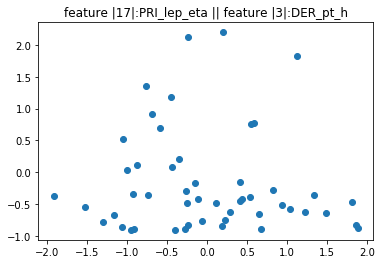

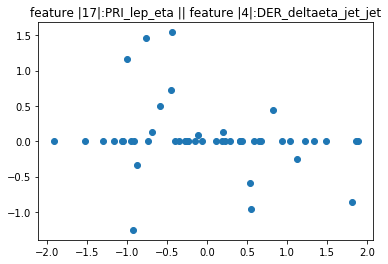

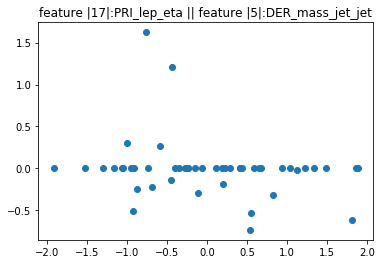

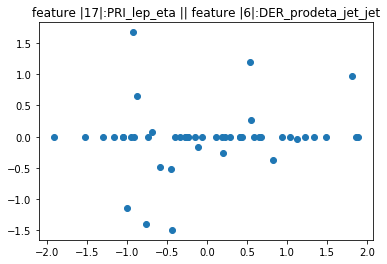

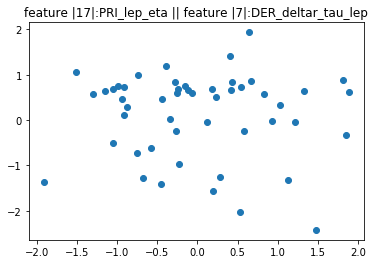

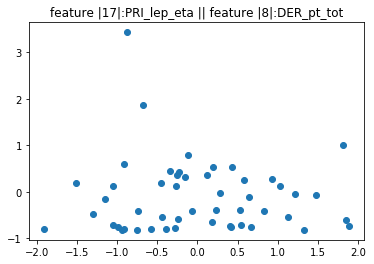

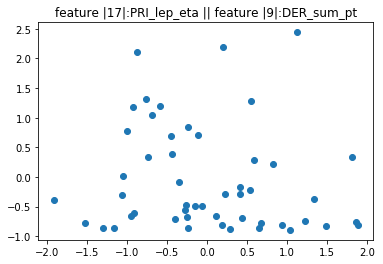

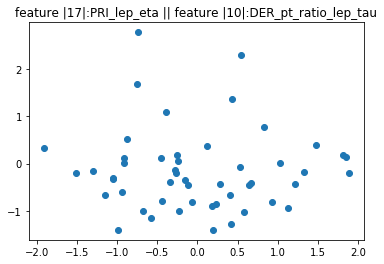

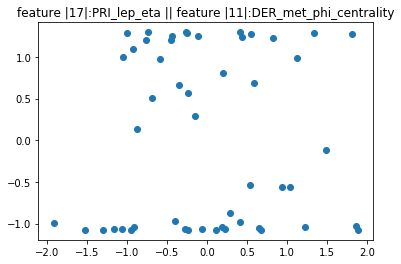

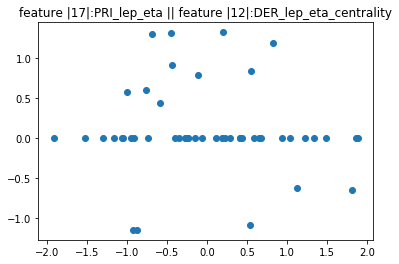

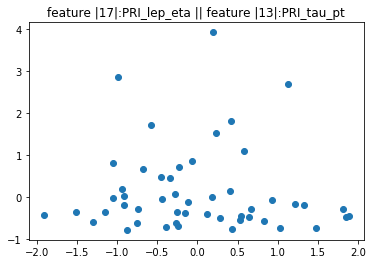

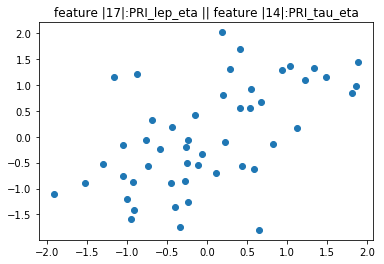

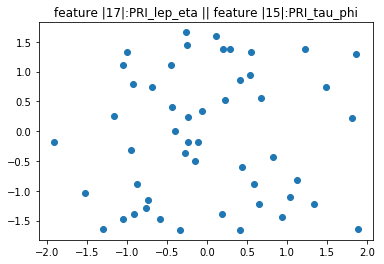

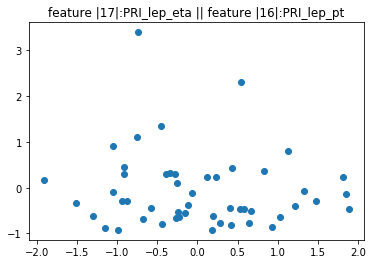

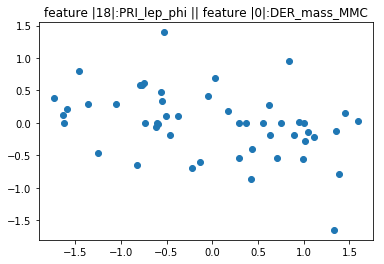

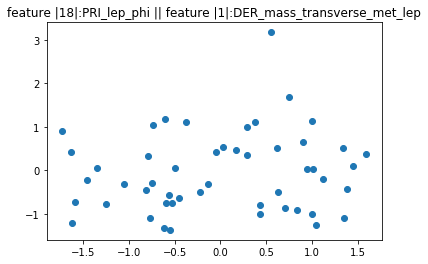

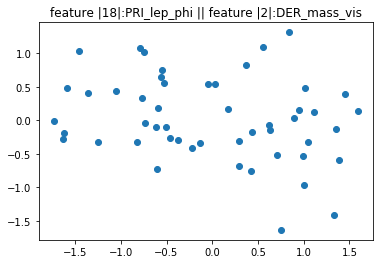

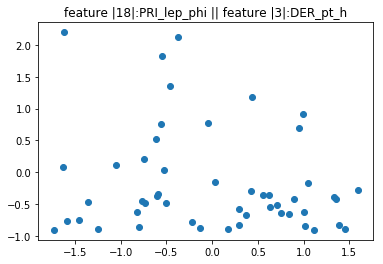

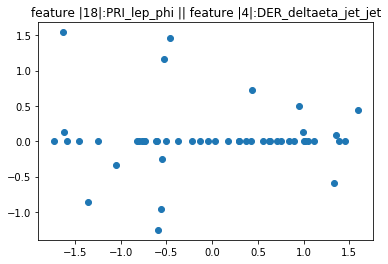

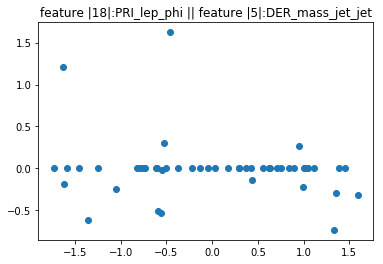

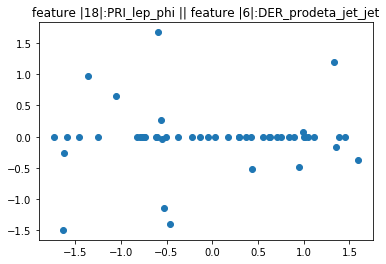

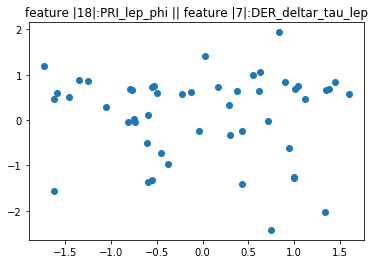

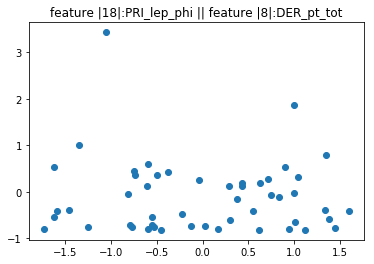

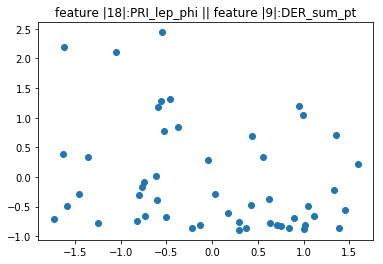

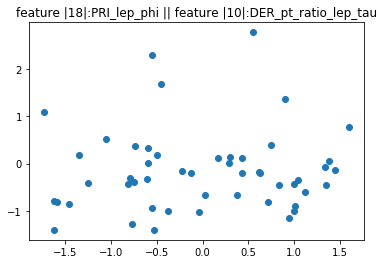

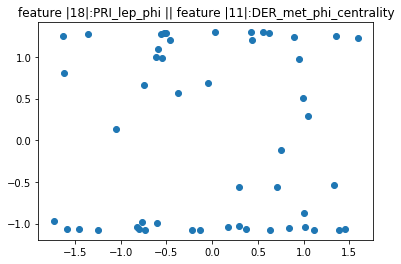

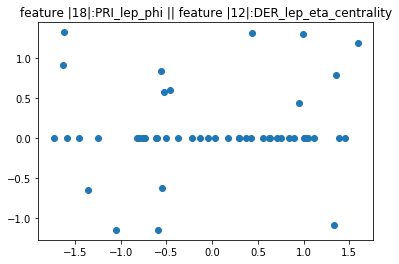

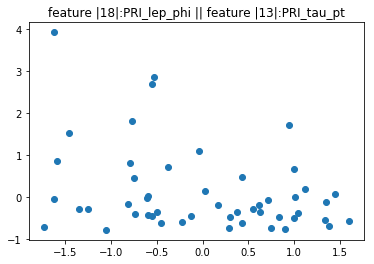

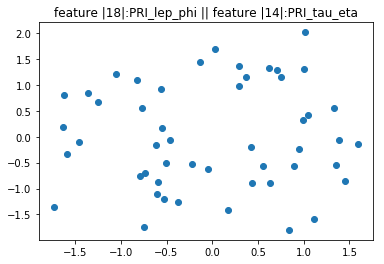

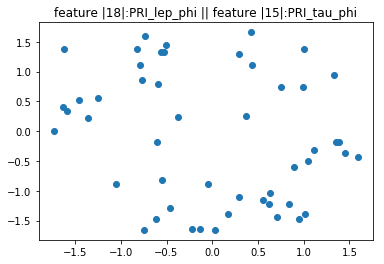

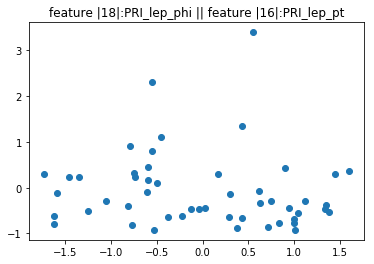

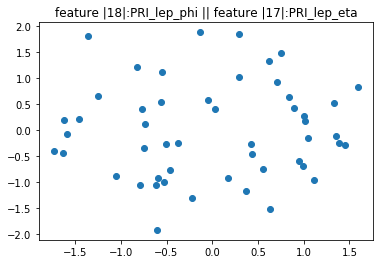

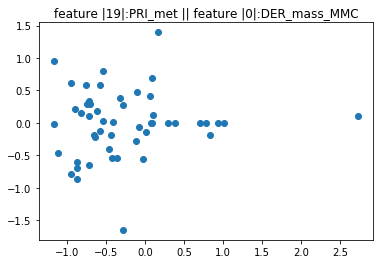

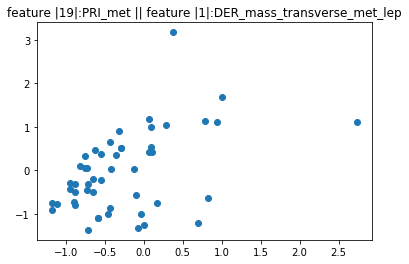

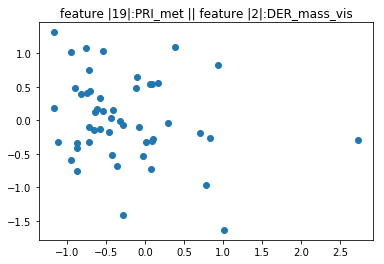

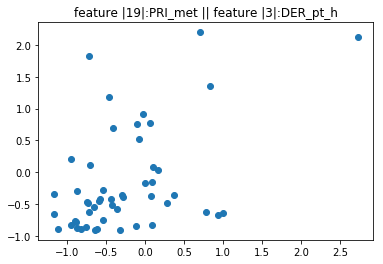

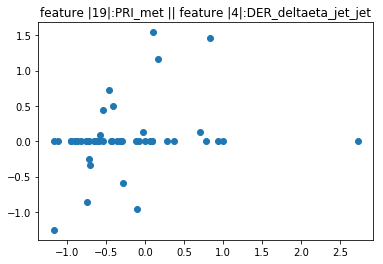

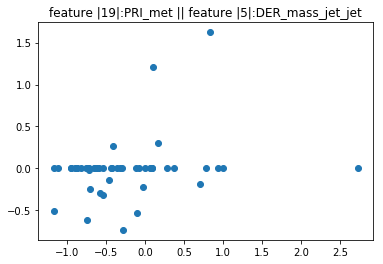

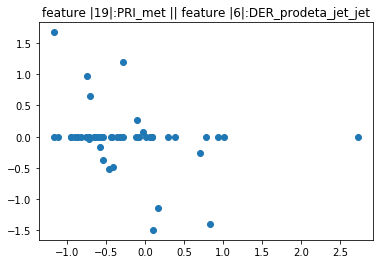

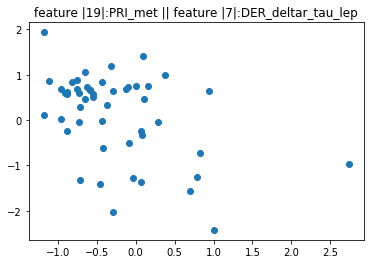

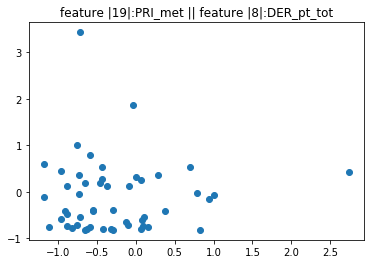

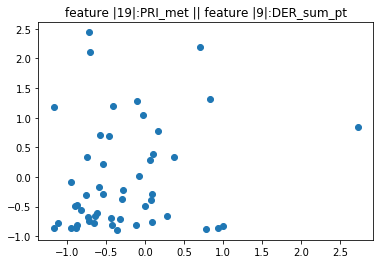

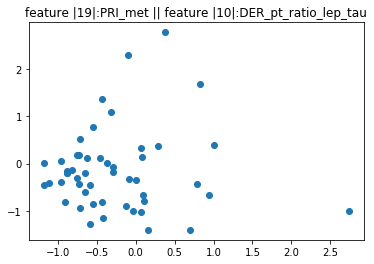

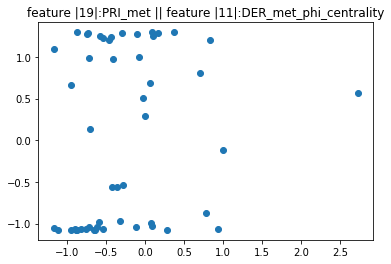

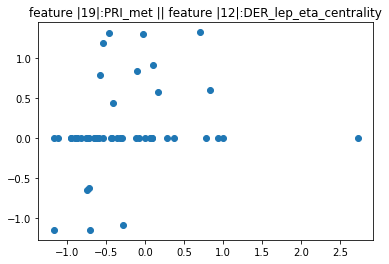

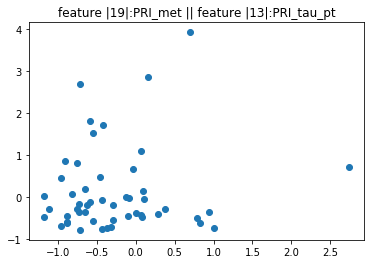

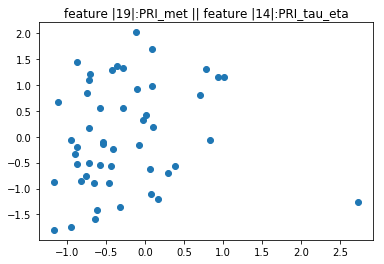

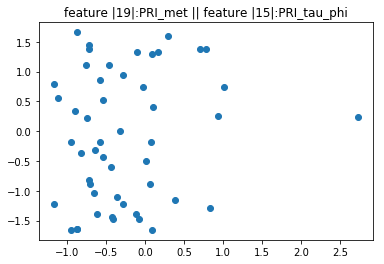

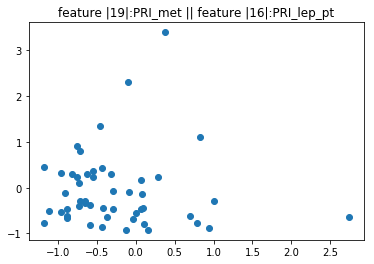

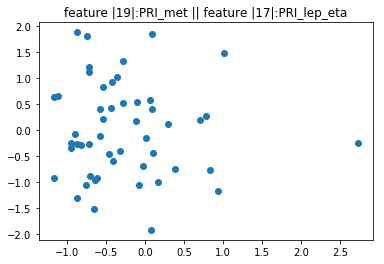

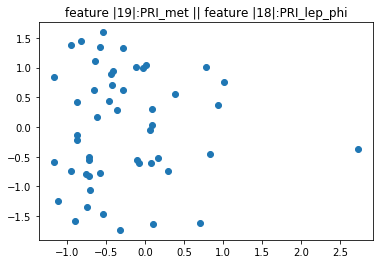

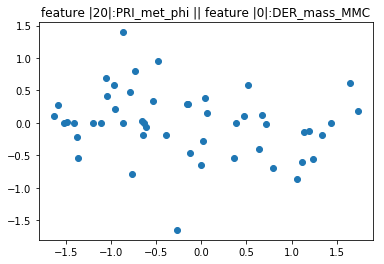

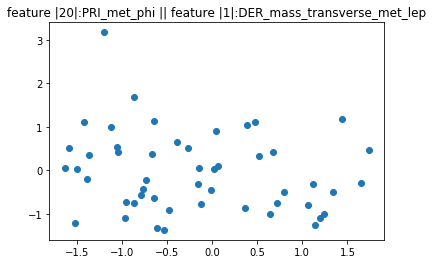

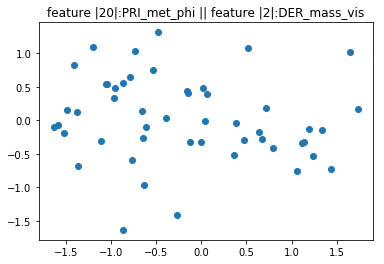

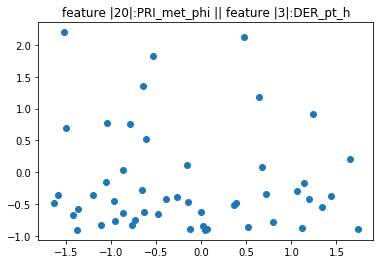

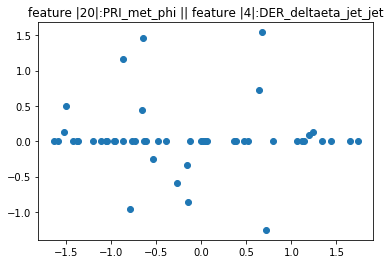

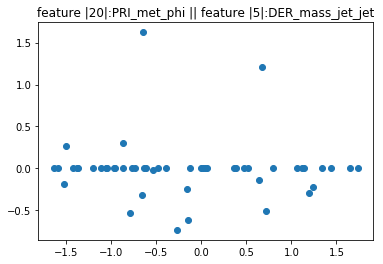

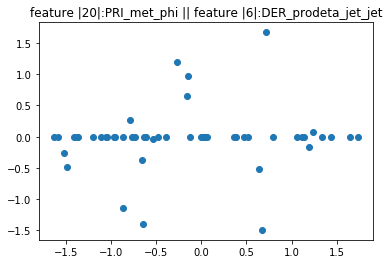

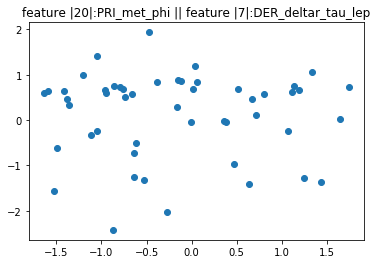

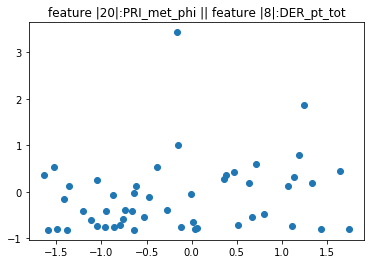

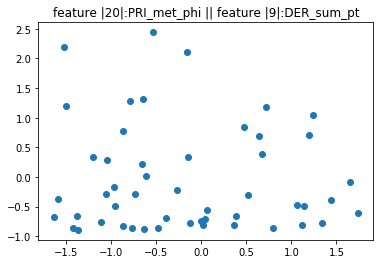

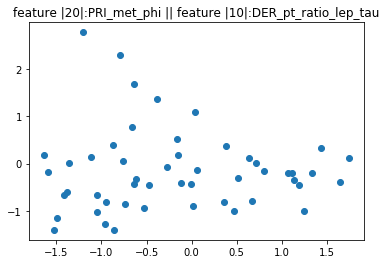

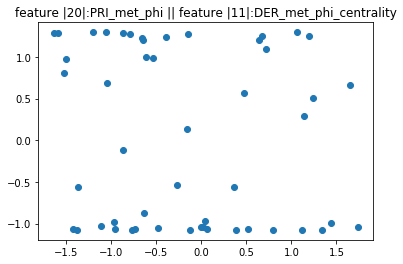

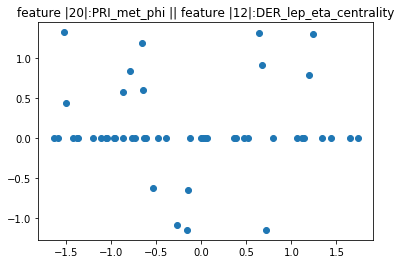

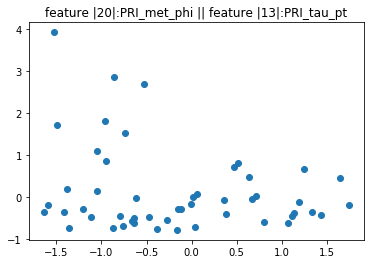

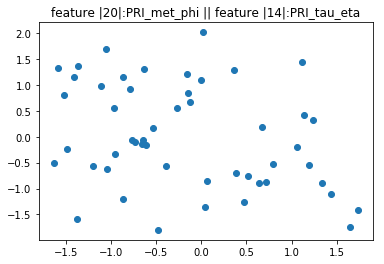

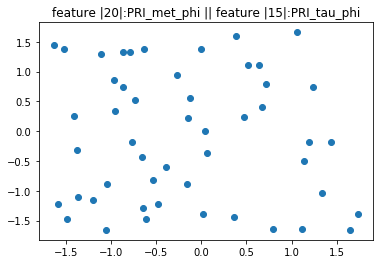

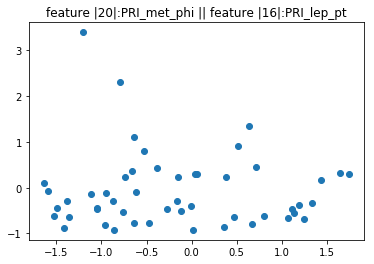

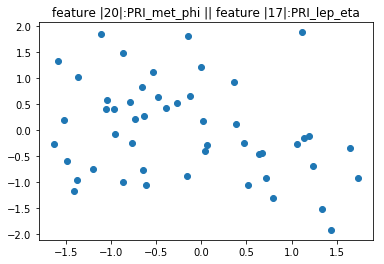

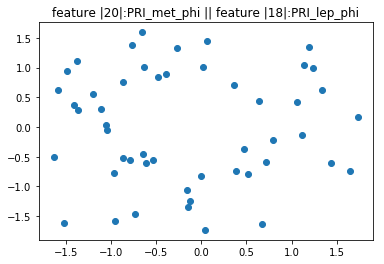

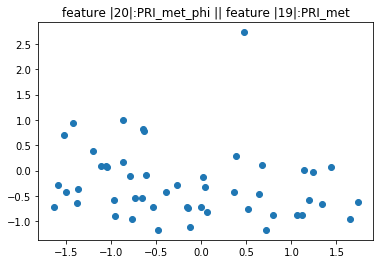

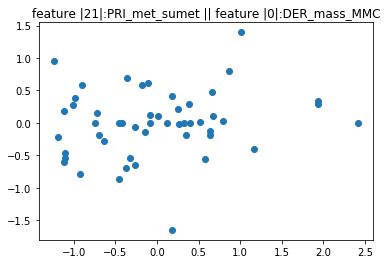

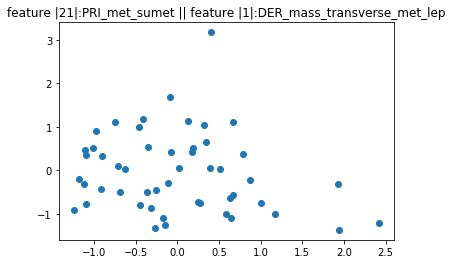

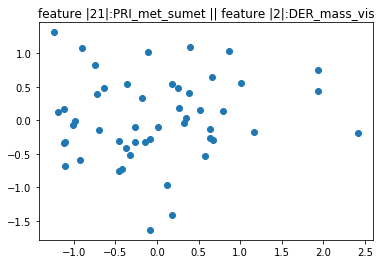

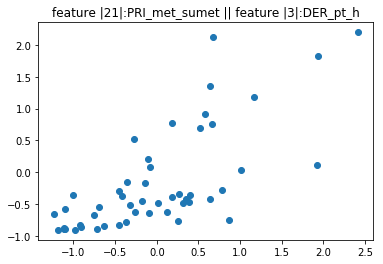

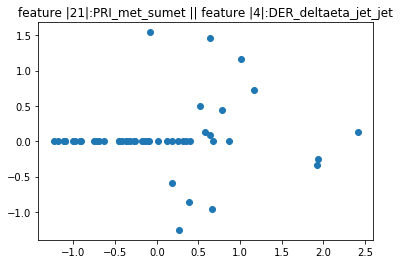

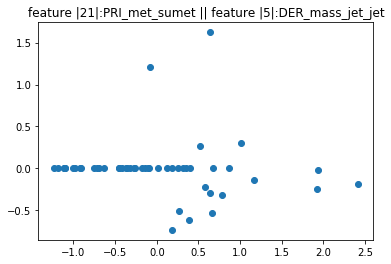

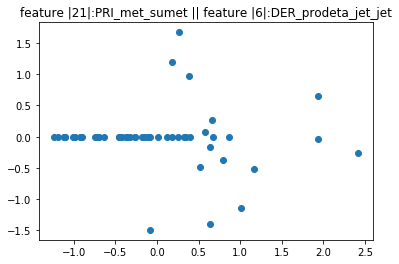

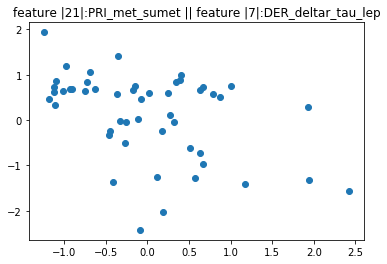

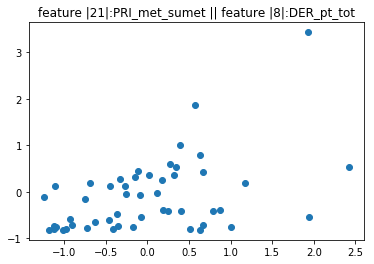

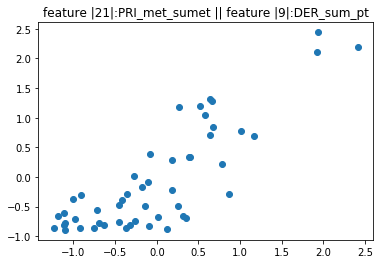

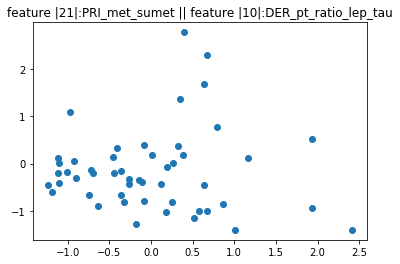

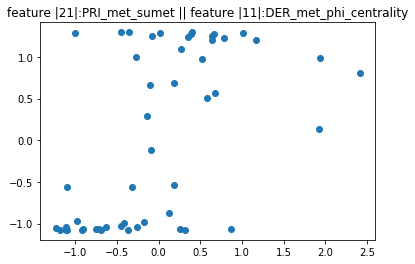

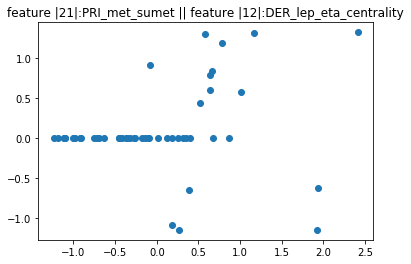

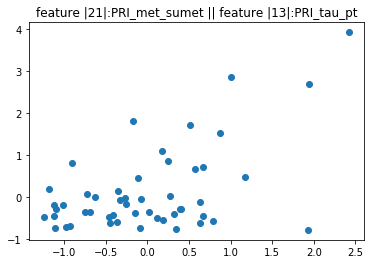

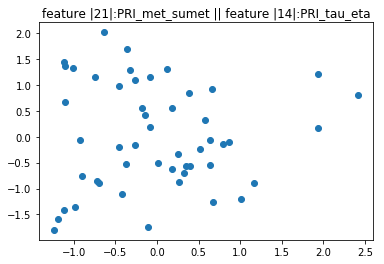

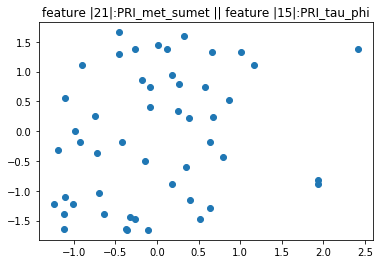

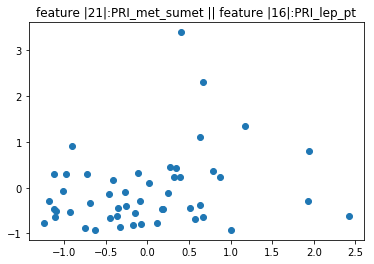

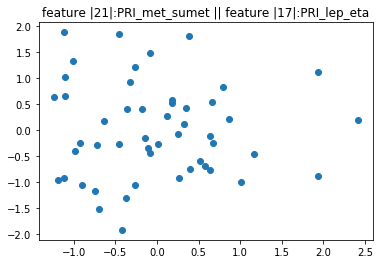

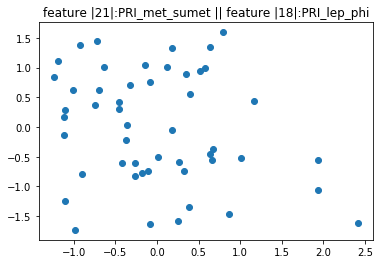

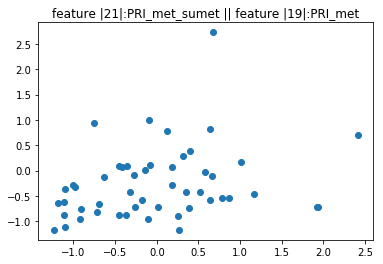

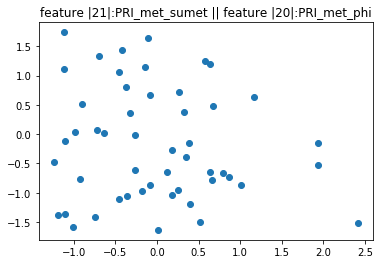

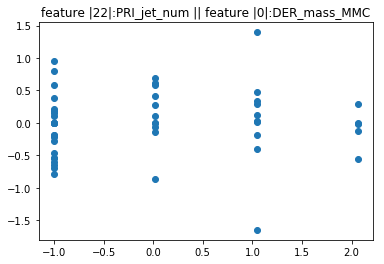

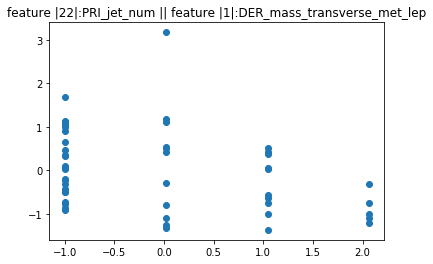

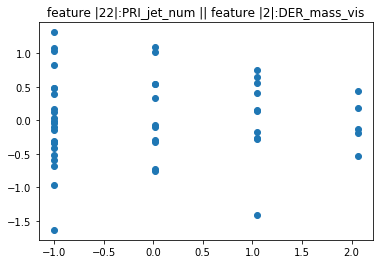

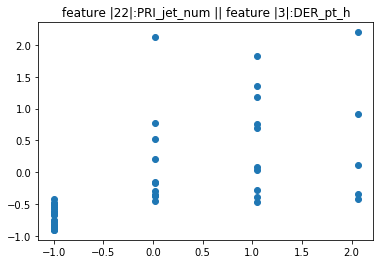

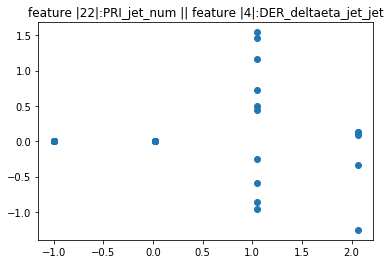

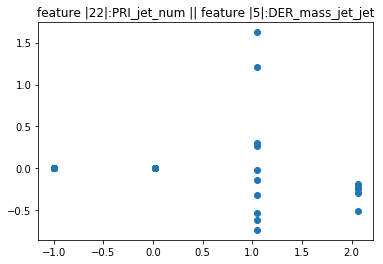

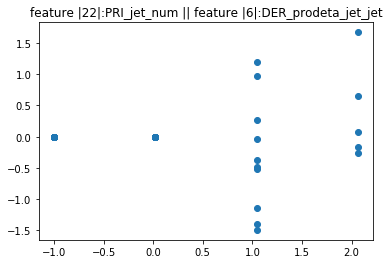

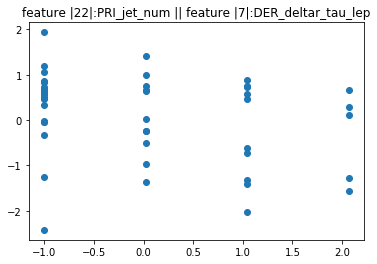

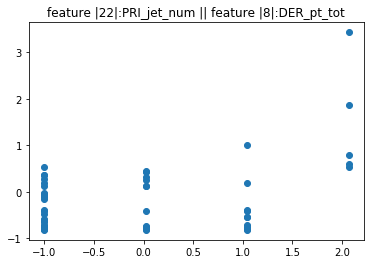

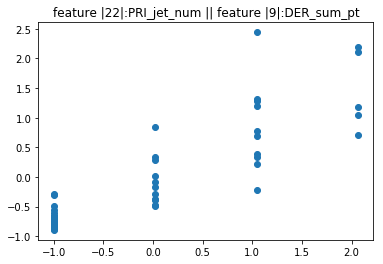

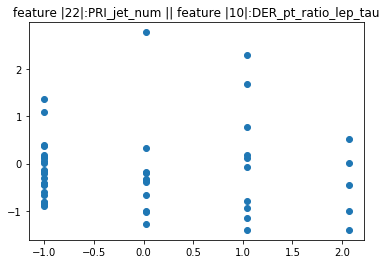

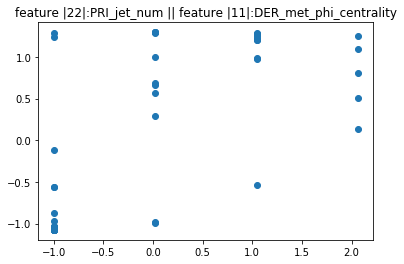

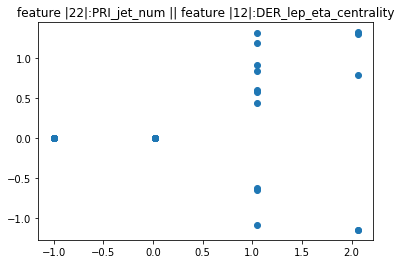

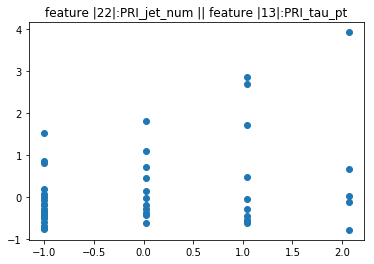

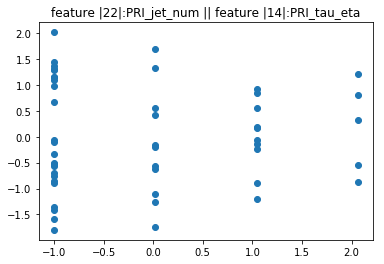

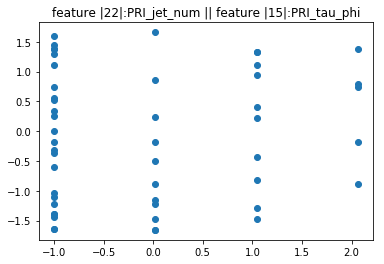

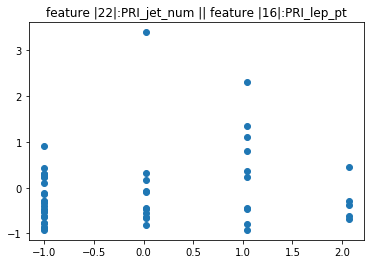

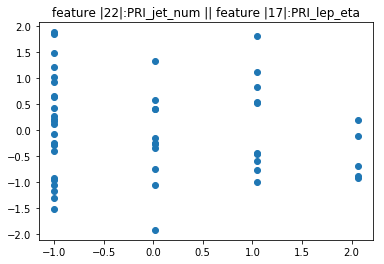

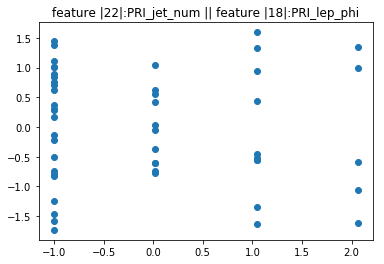

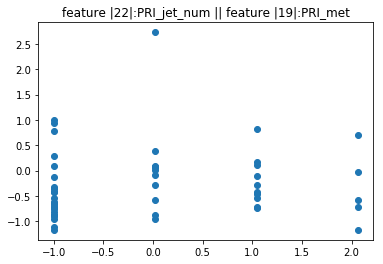

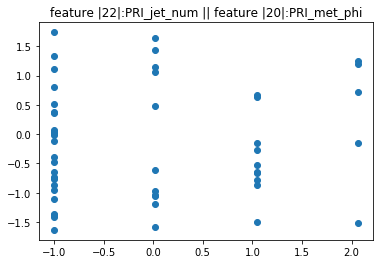

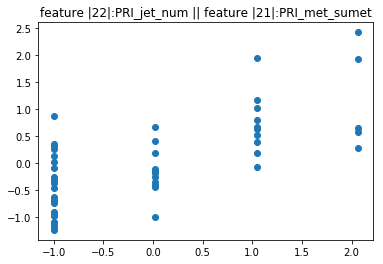

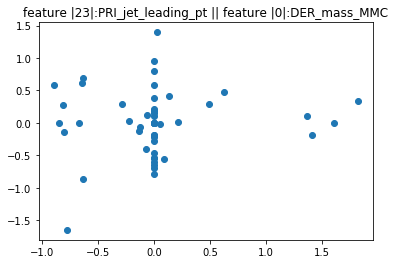

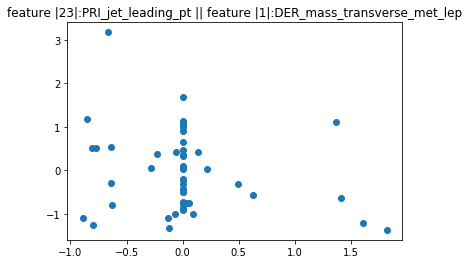

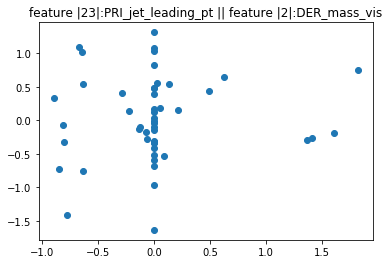

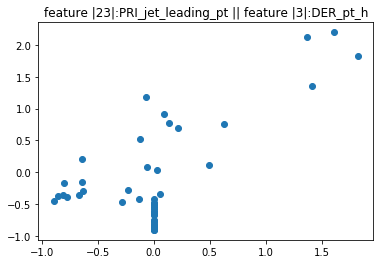

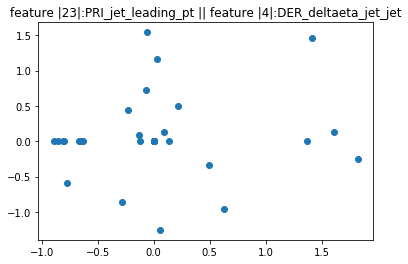

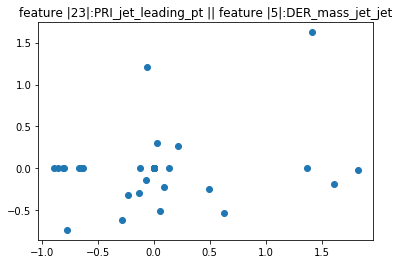

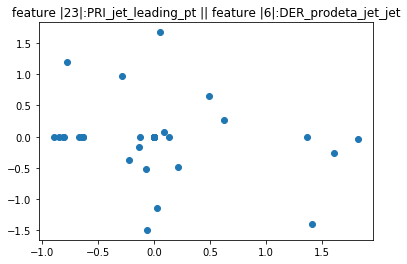

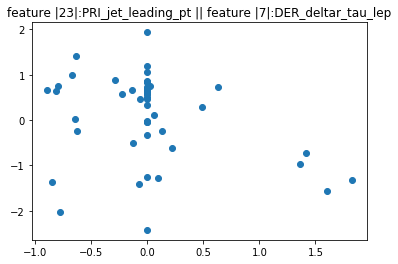

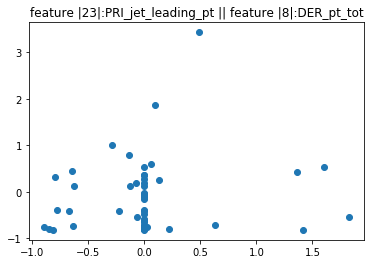

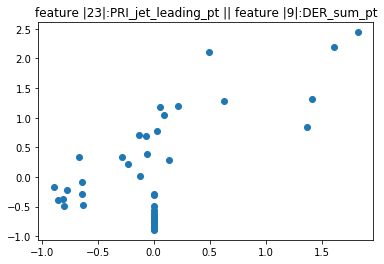

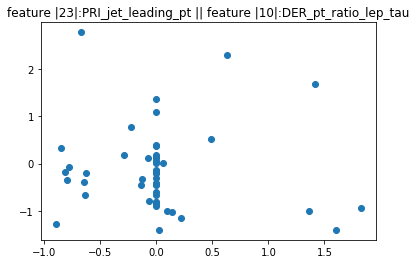

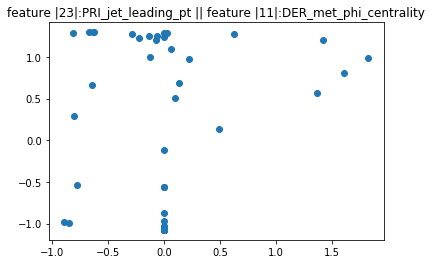

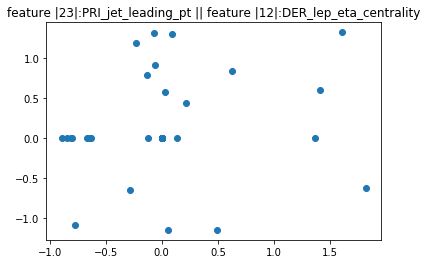

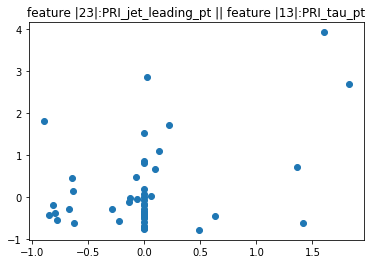

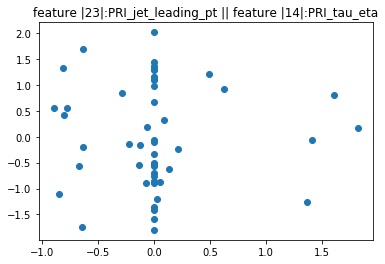

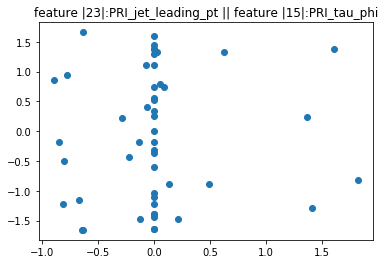

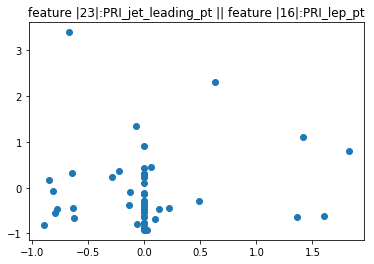

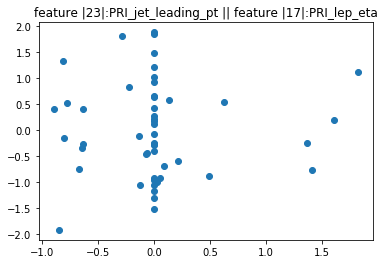

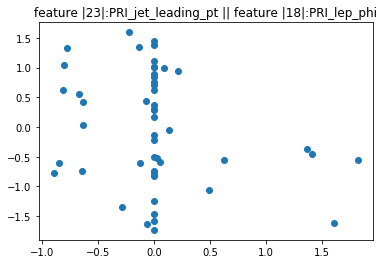

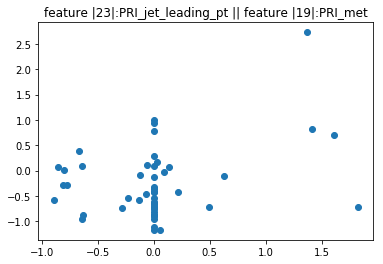

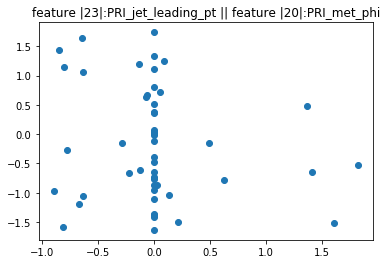

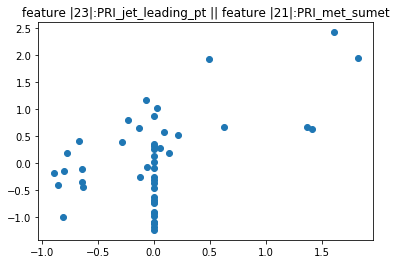

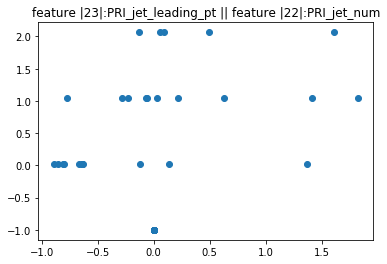

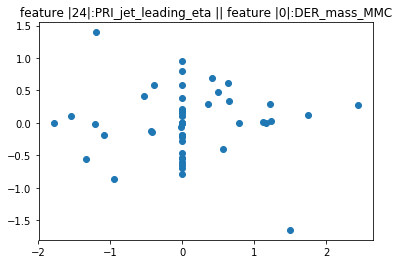

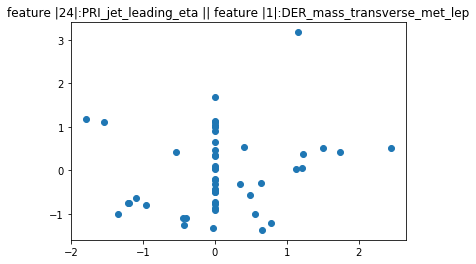

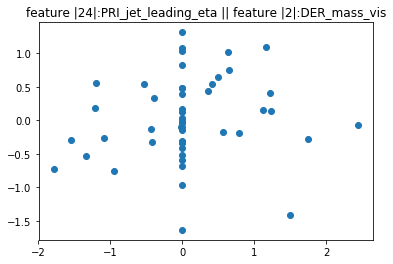

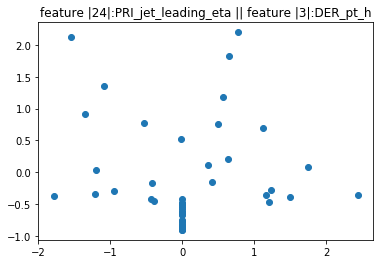

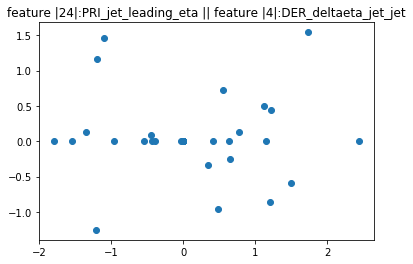

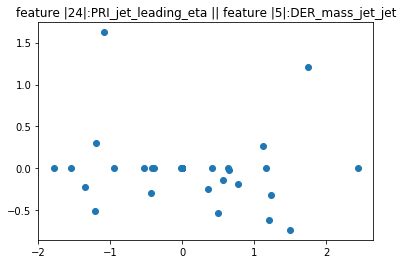

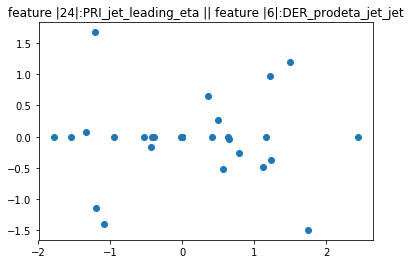

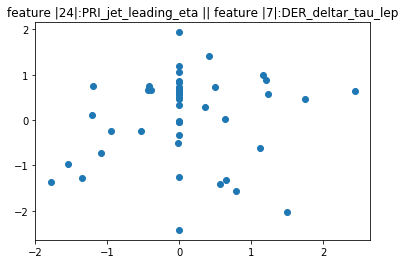

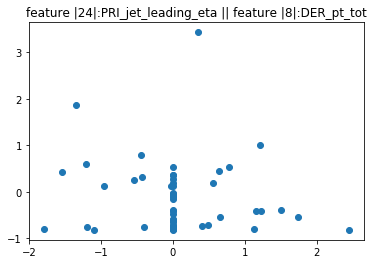

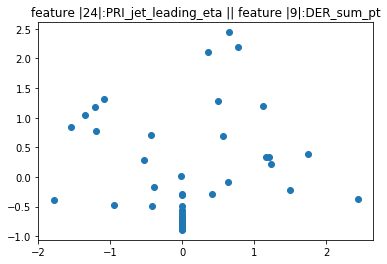

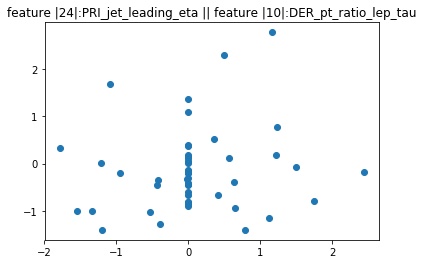

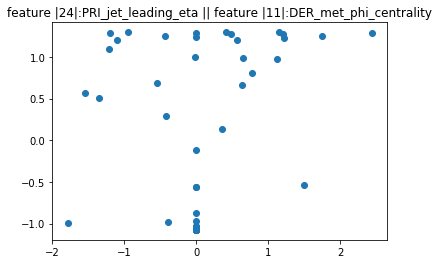

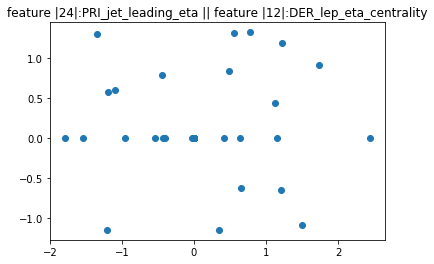

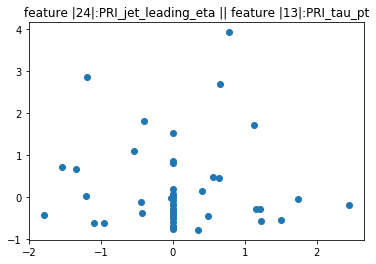

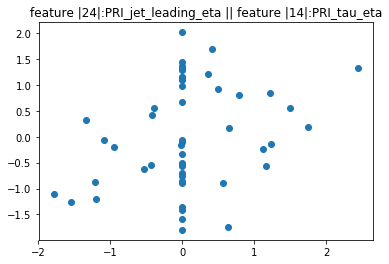

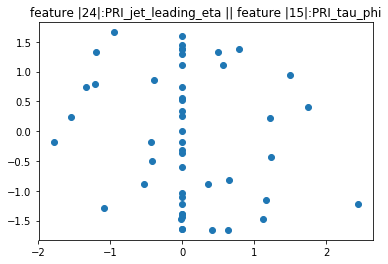

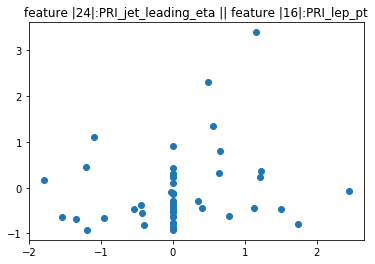

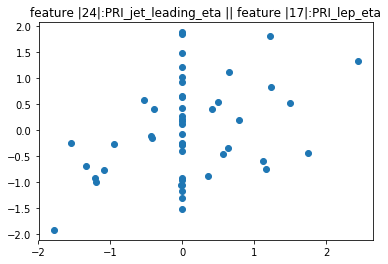

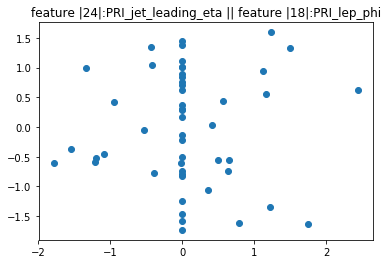

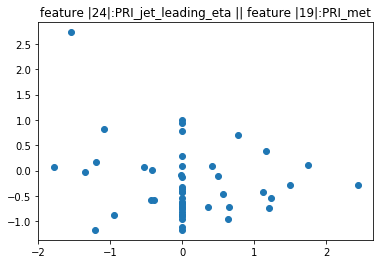

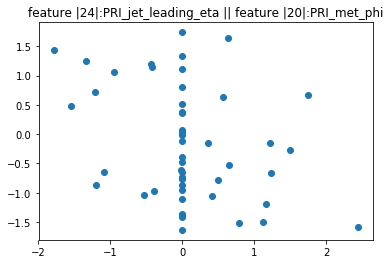

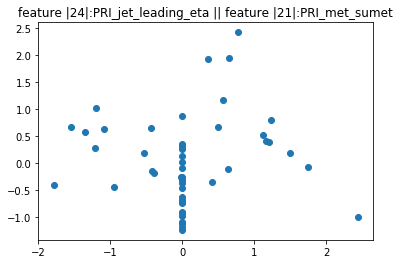

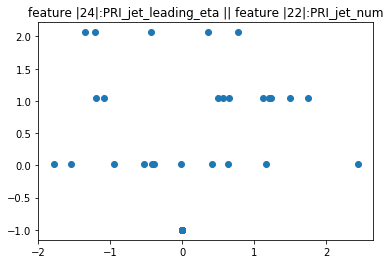

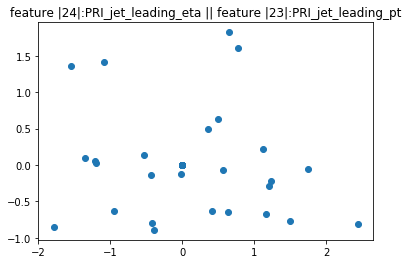

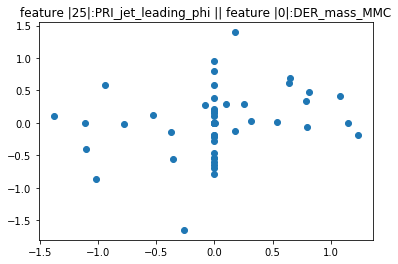

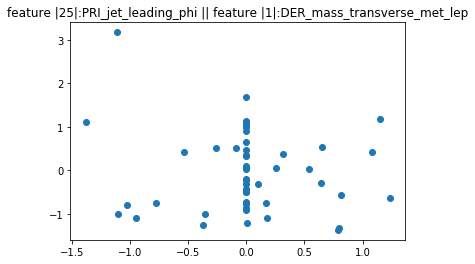

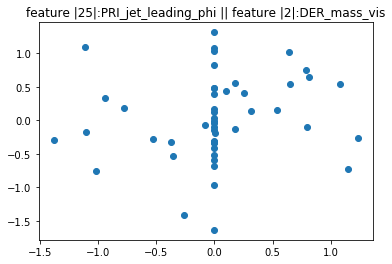

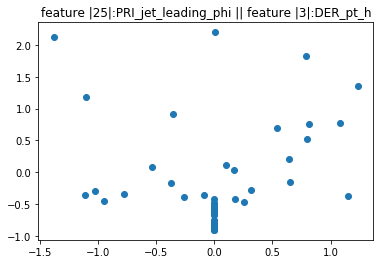

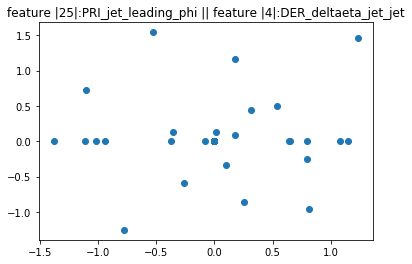

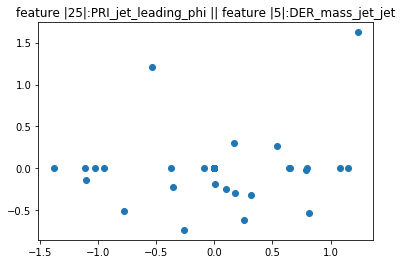

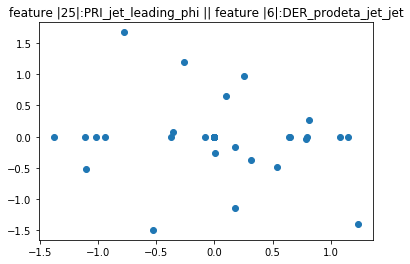

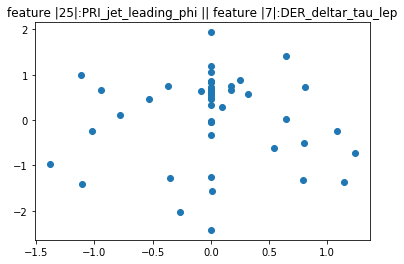

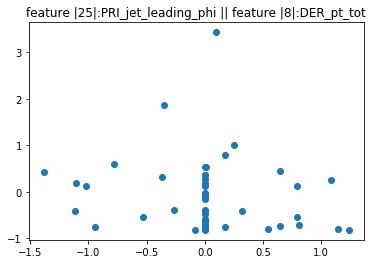

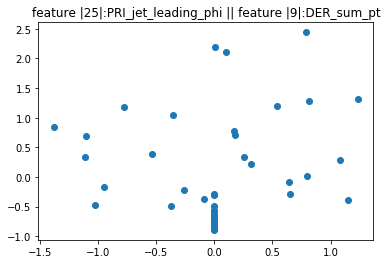

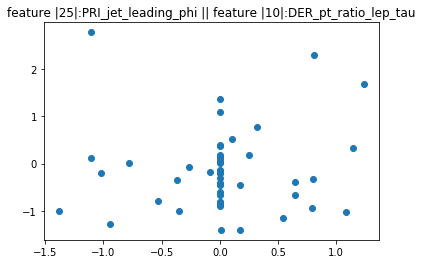

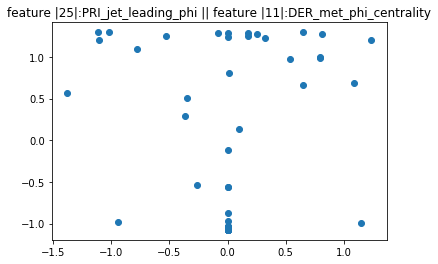

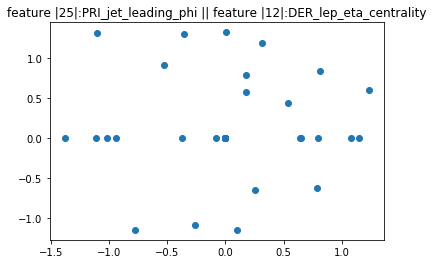

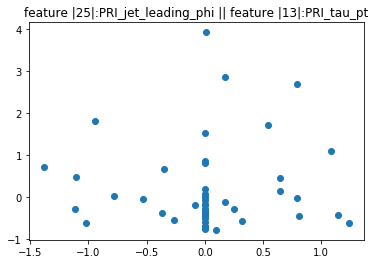

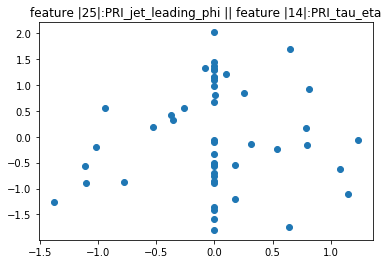

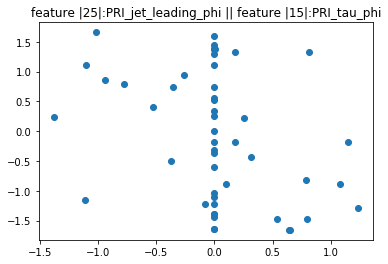

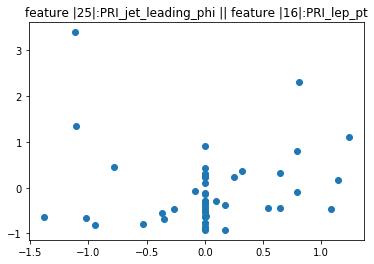

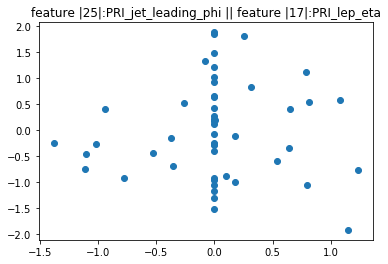

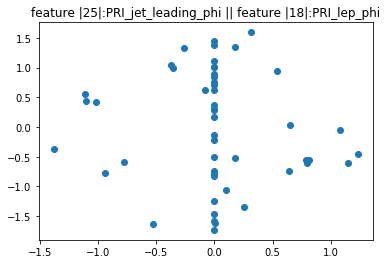

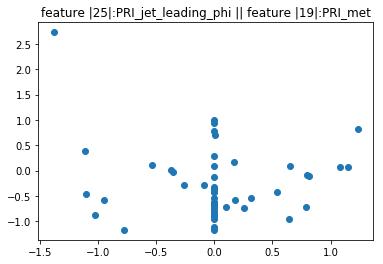

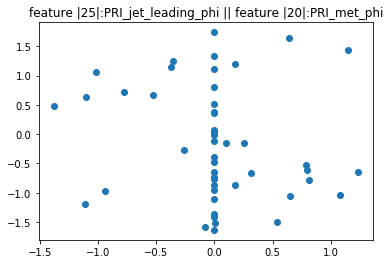

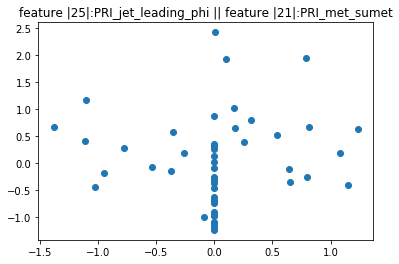

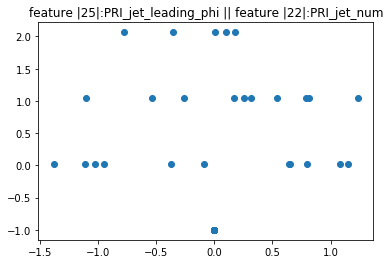

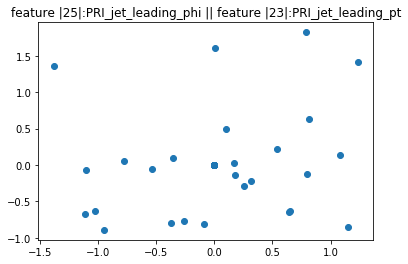

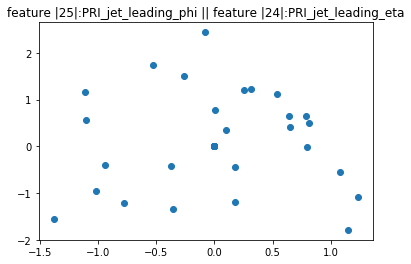

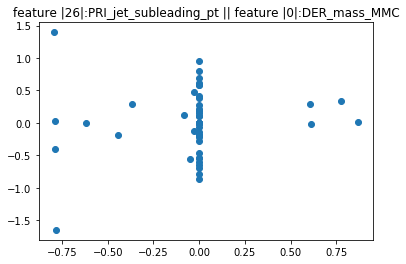

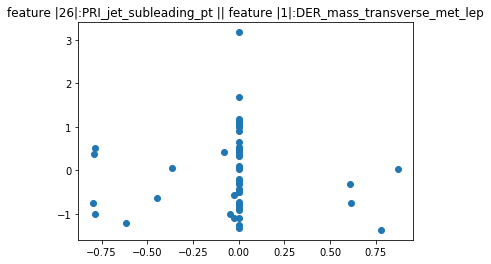

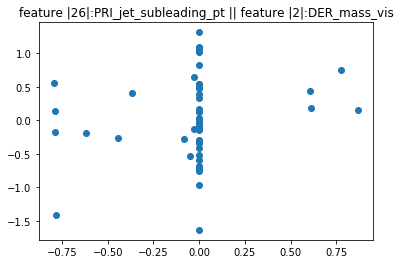

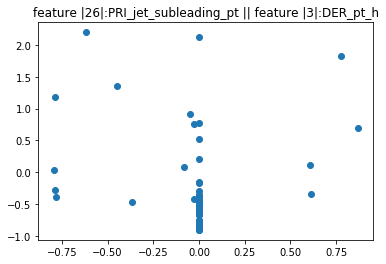

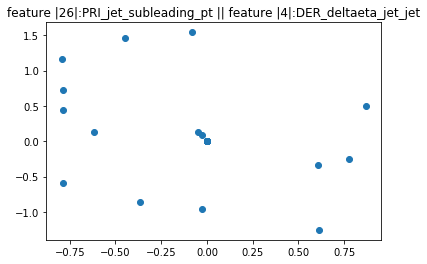

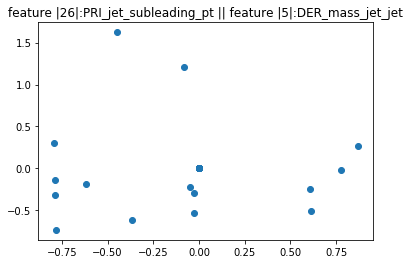

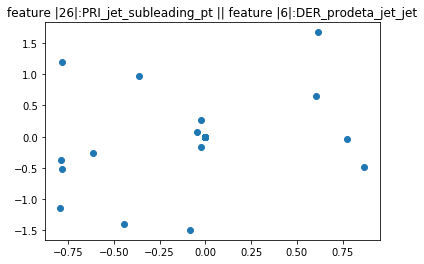

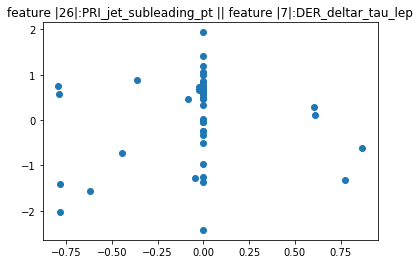

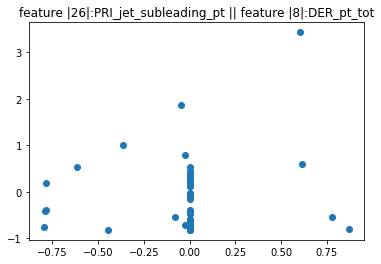

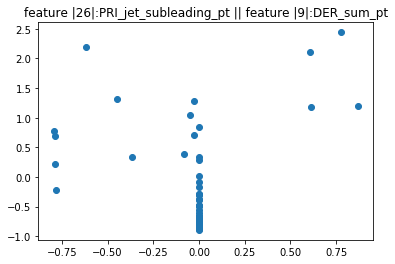

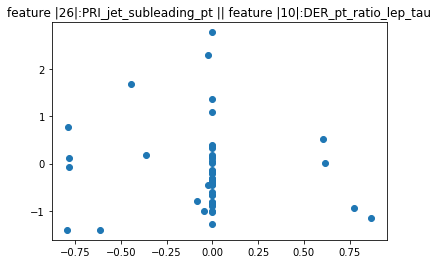

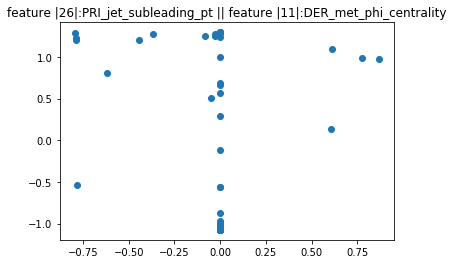

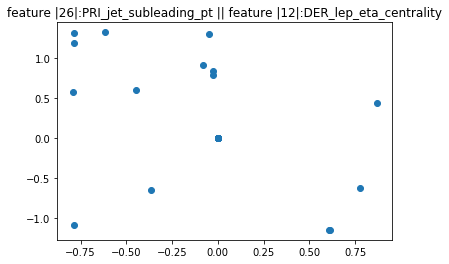

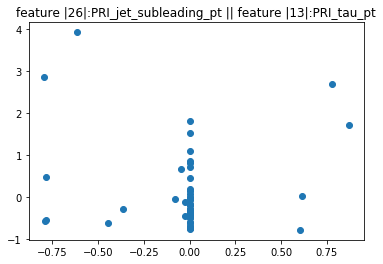

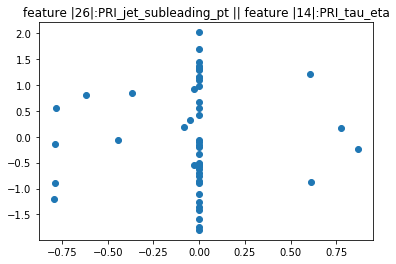

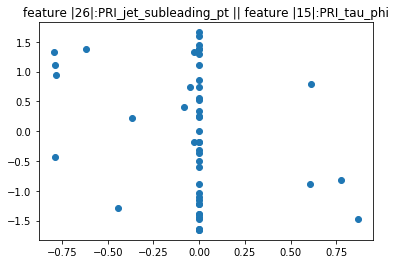

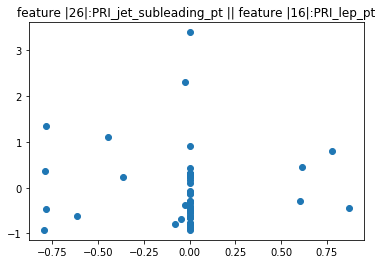

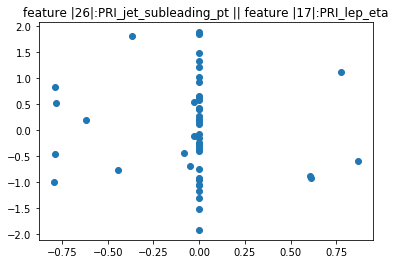

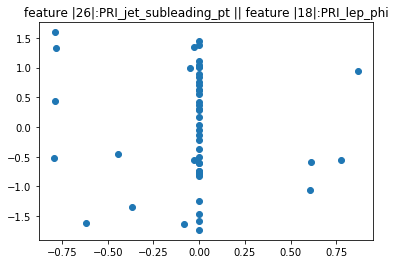

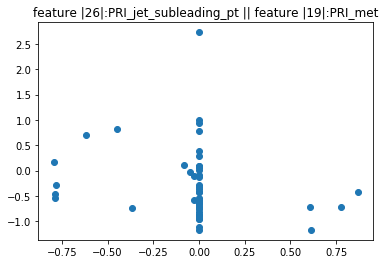

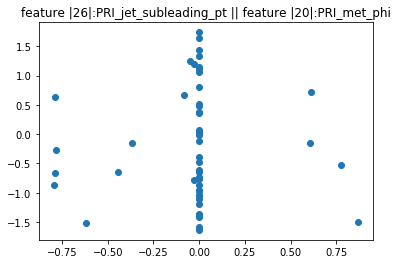

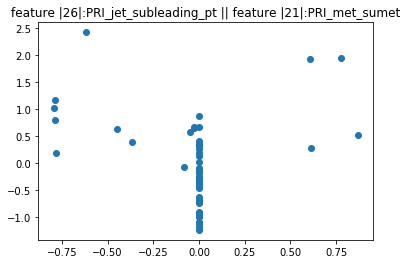

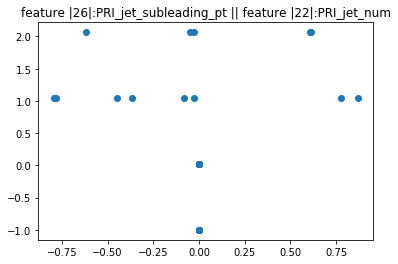

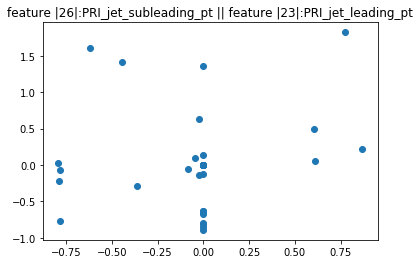

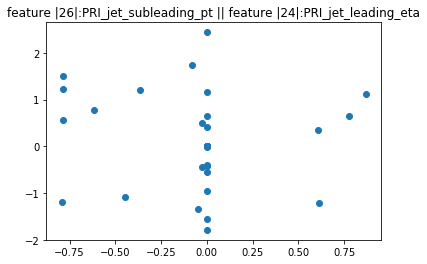

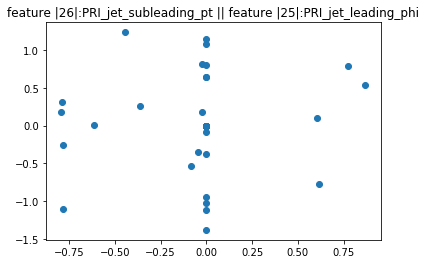

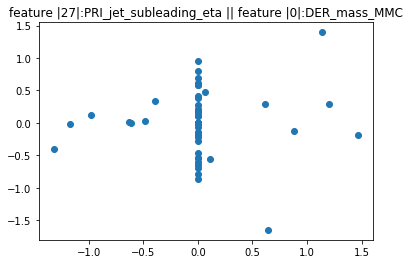

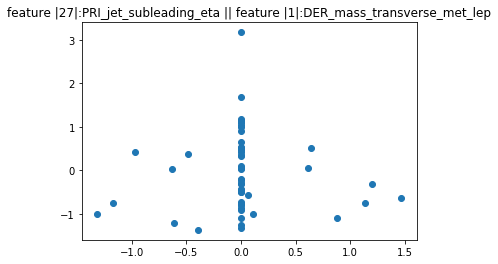

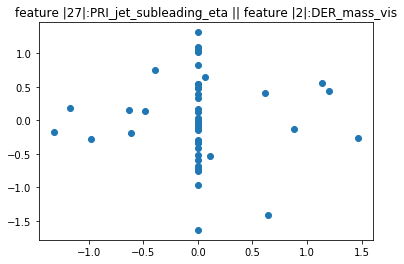

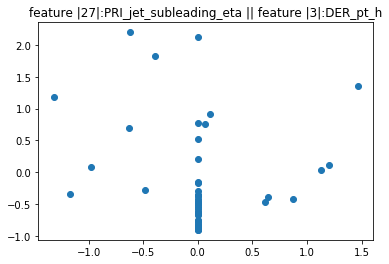

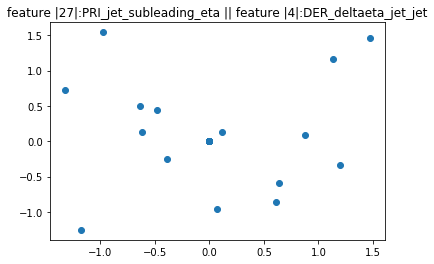

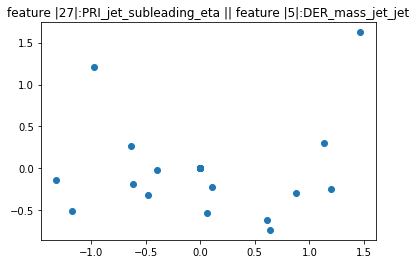

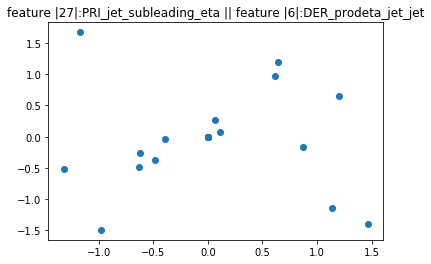

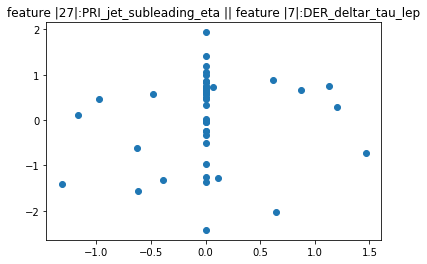

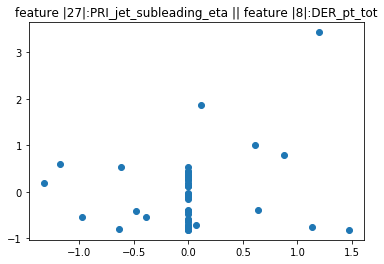

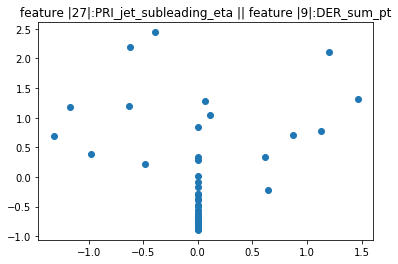

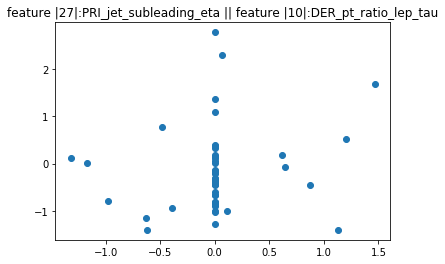

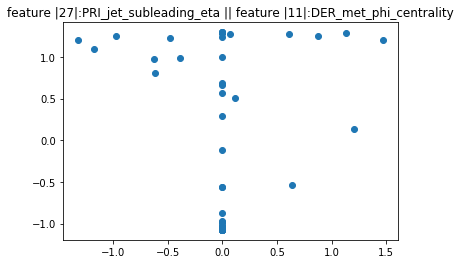

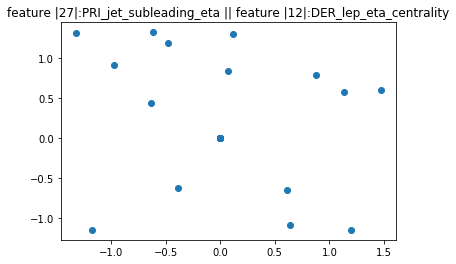

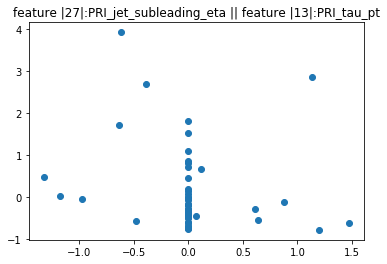

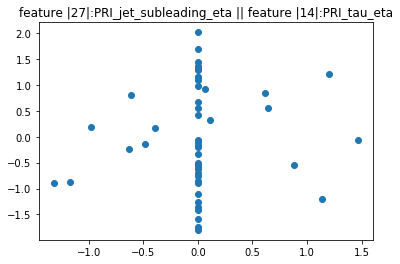

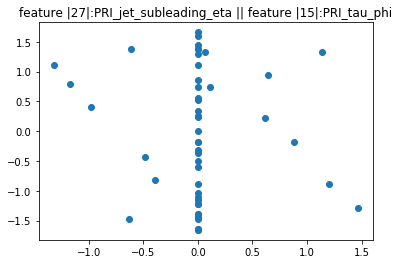

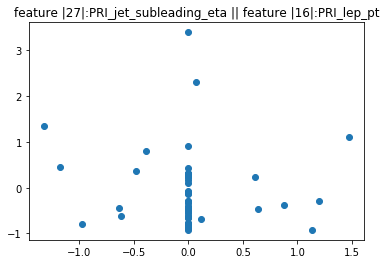

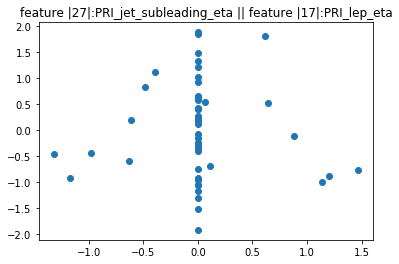

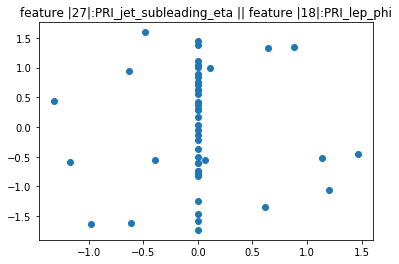

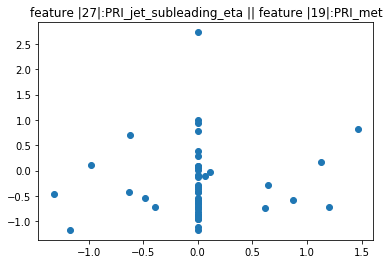

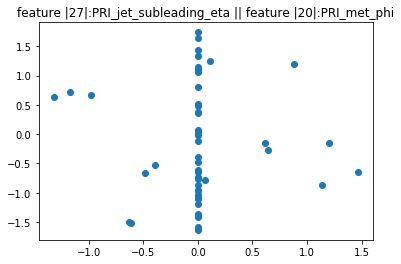

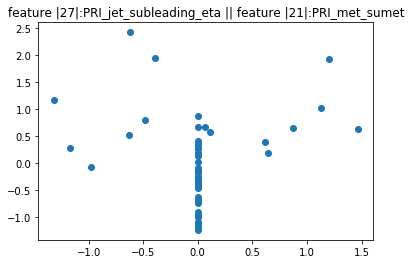

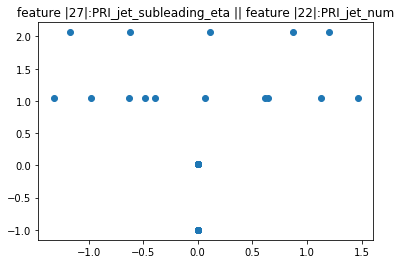

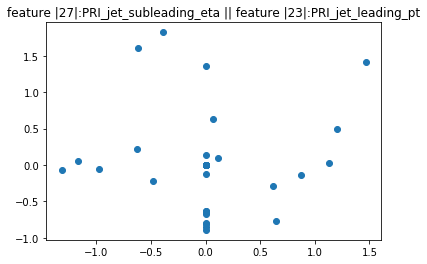

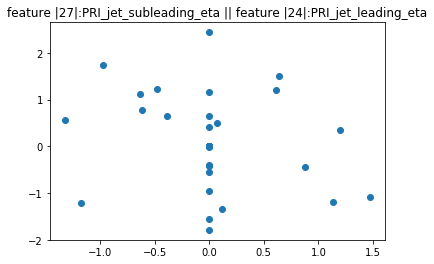

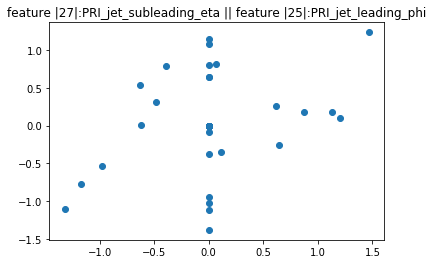

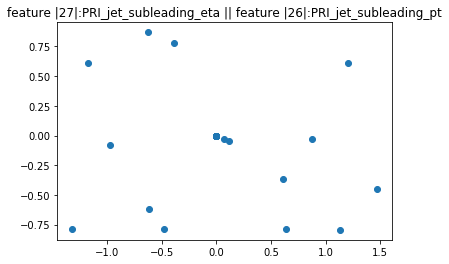

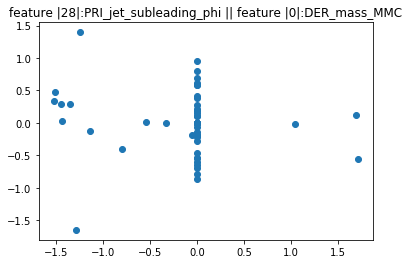

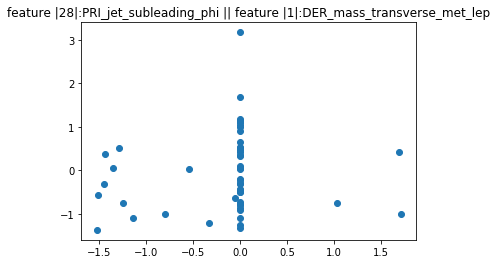

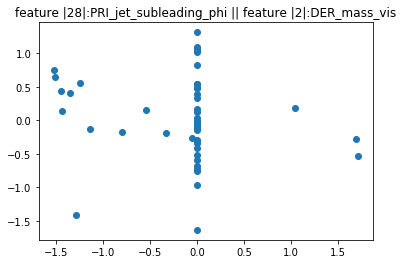

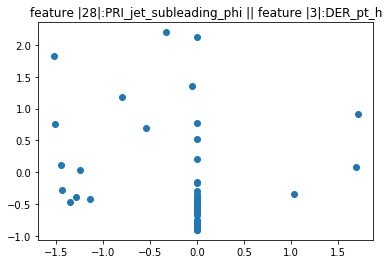

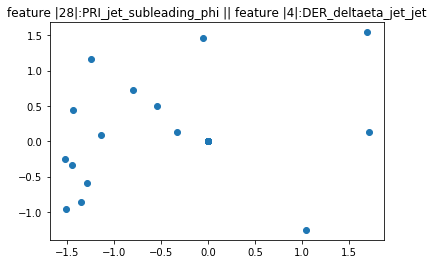

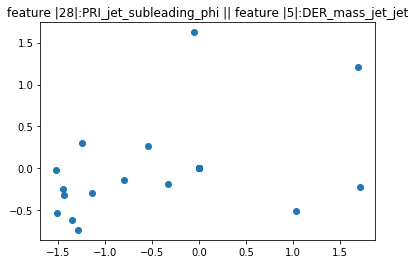

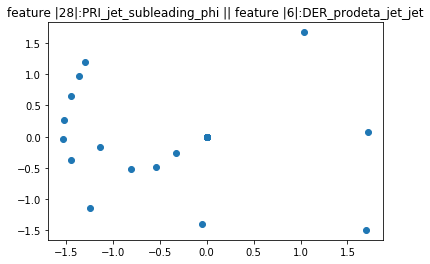

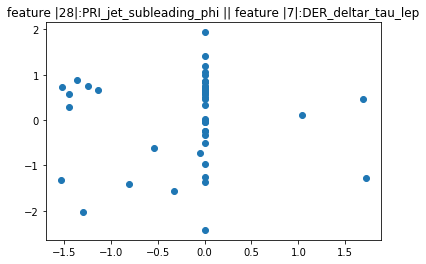

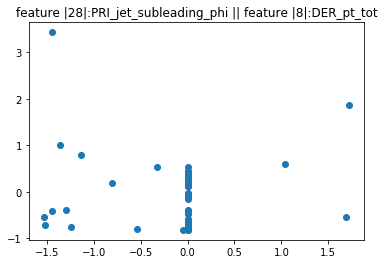

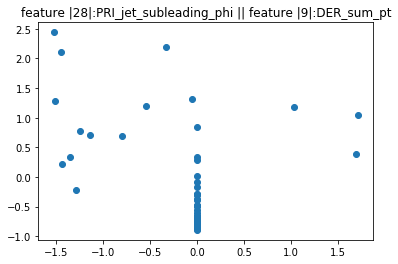

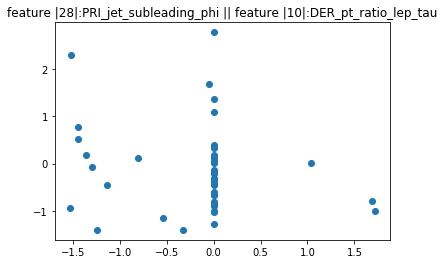

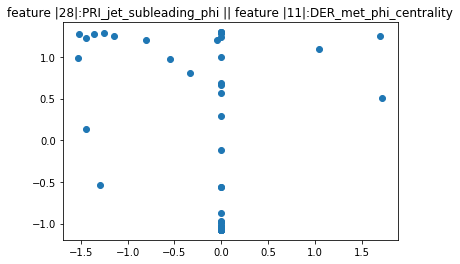

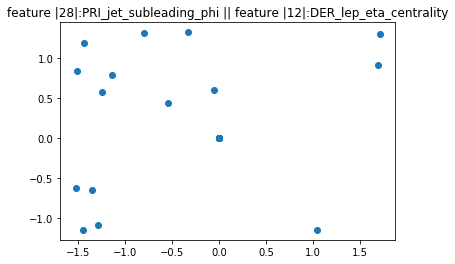

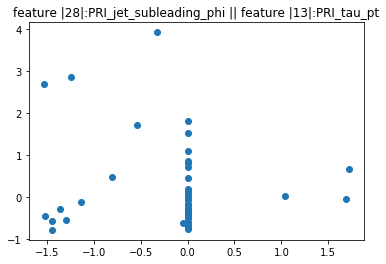

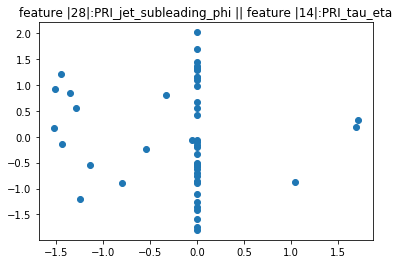

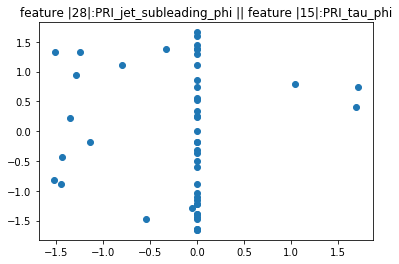

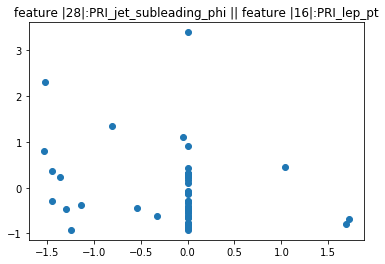

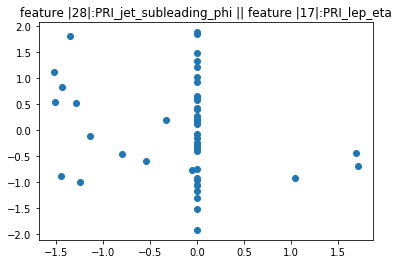

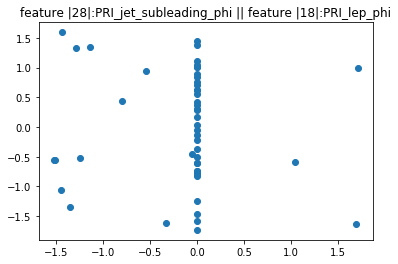

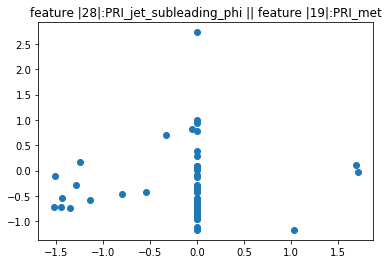

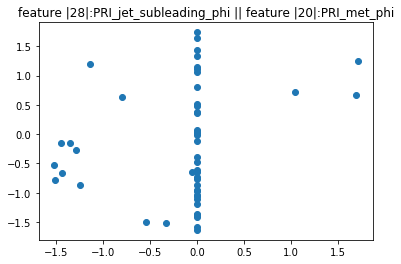

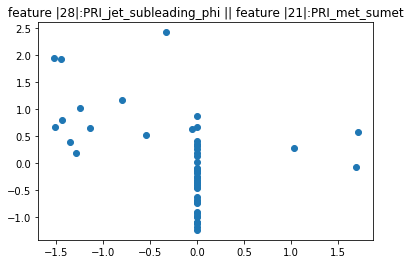

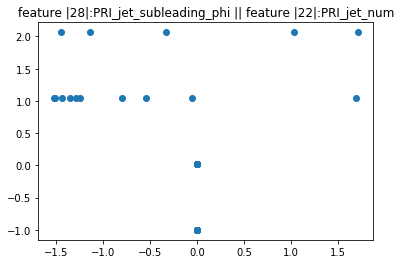

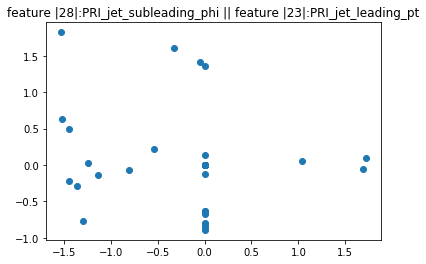

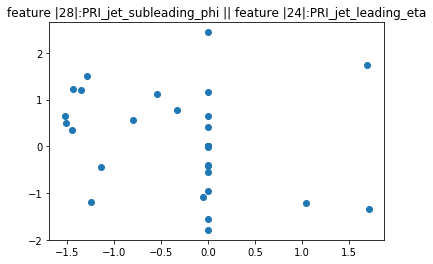

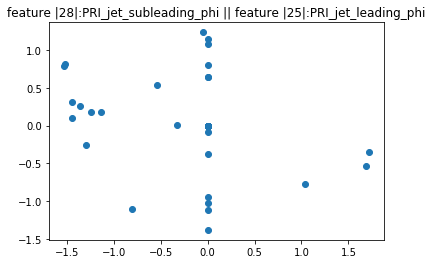

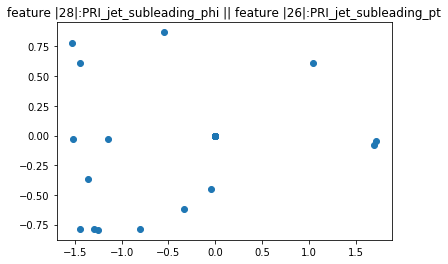

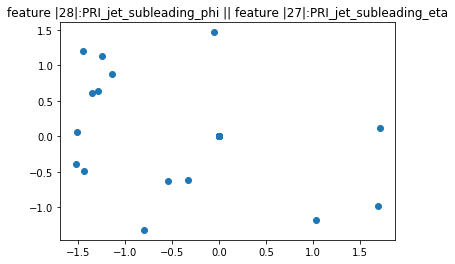

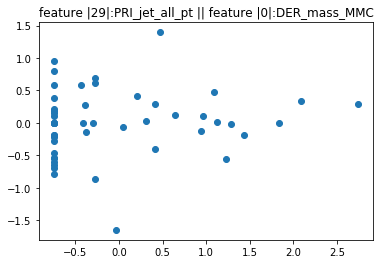

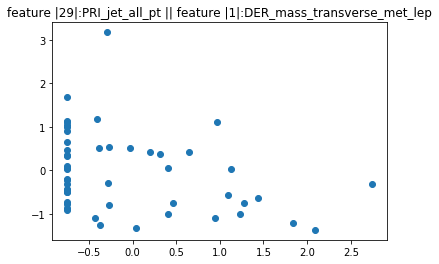

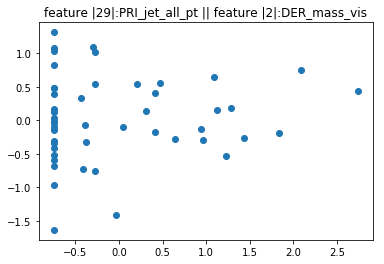

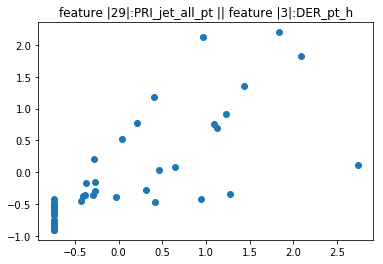

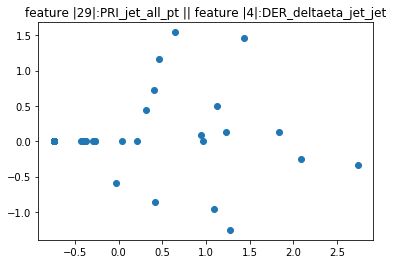

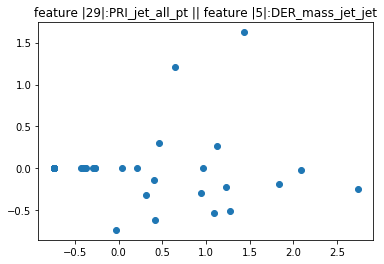

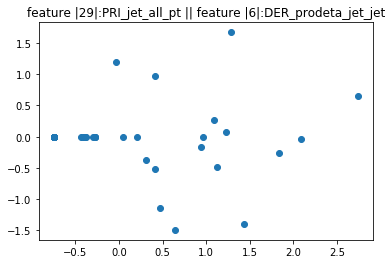

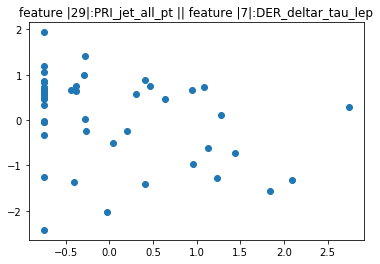

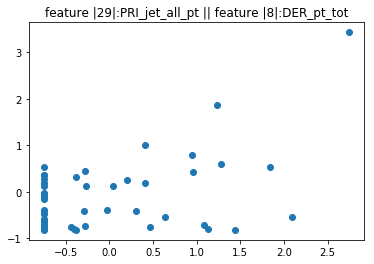

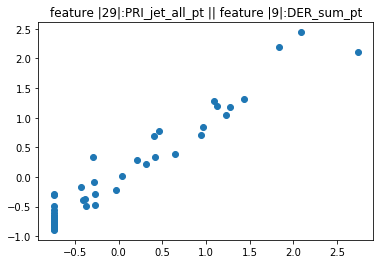

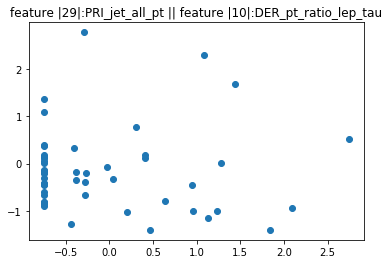

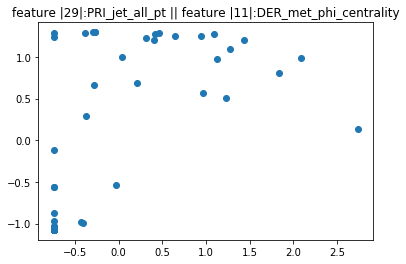

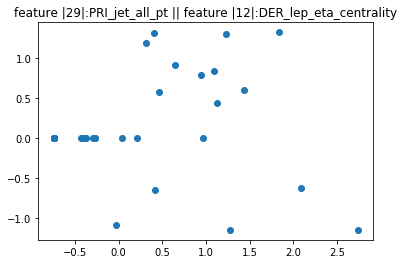

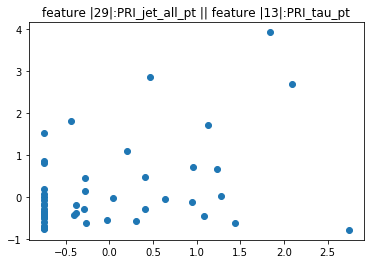

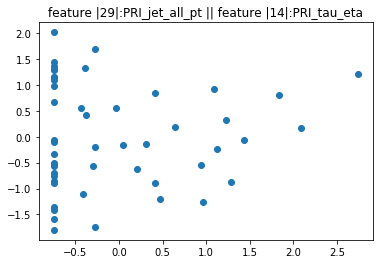

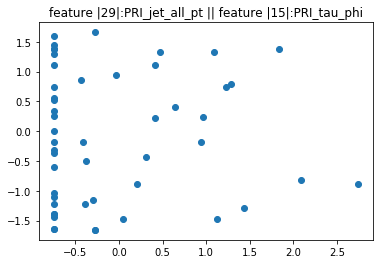

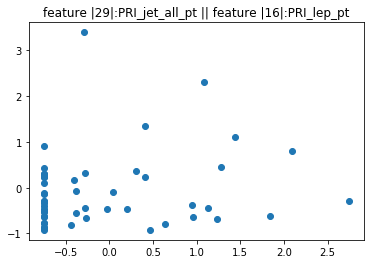

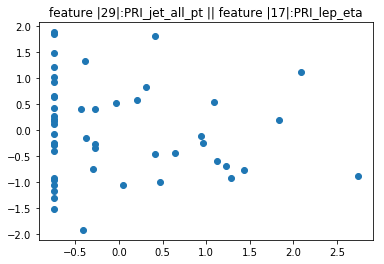

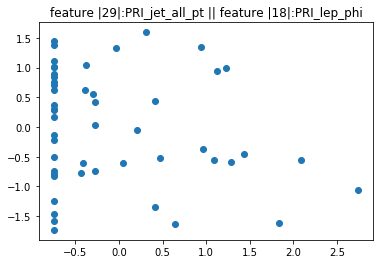

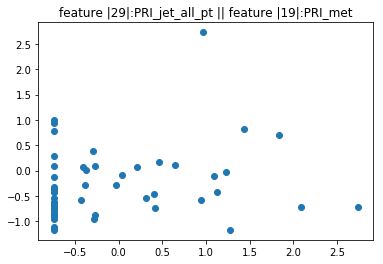

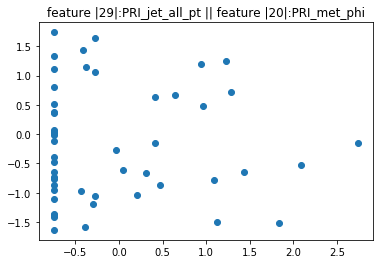

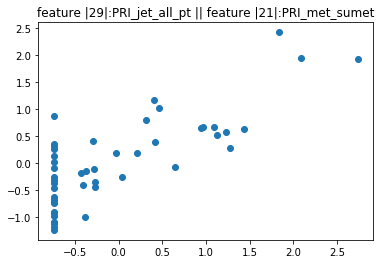

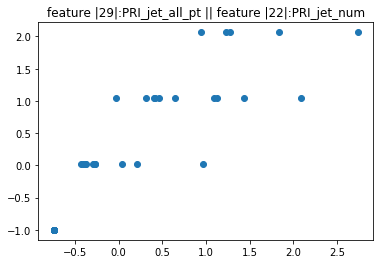

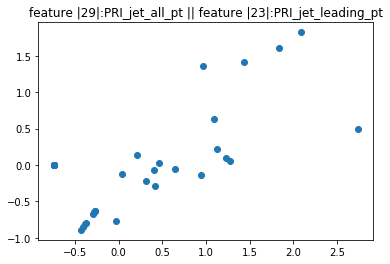

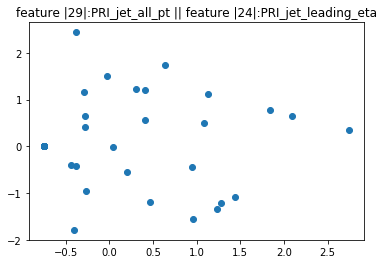

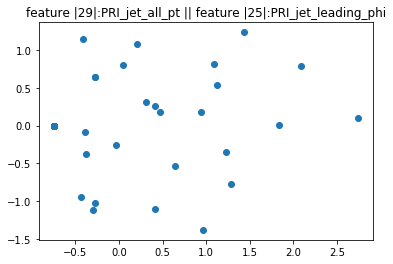

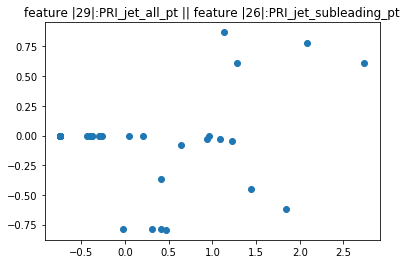

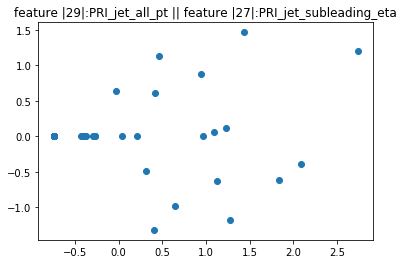

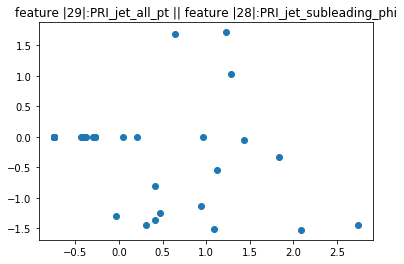

In [56]:
for i in range(D-1):
    plt.figure()
    for j in range(i):
        plt.title("feature |{}|:{} || feature |{}|:{}".format(i, features_name[i+2], j, features_name[j+2]))
        plt.plot(sample_features[:,i+1], sample_features[:,j+1], 'o')
        plt.show()

## learning

In [12]:
losses = []
ws = []

for gamma in np.linspace(0.1,1,10):
    loss, w = least_squares_GD(validation_labels, validation_set, np.zeros(validation_set.shape[1]), 100, gamma)
    losses.append(loss)
    ws.append(w)

In [18]:
w = ws[np.argmin(losses)]

## test data

In [19]:
pred_tr = training_set @ w
pred_tr = np.where(pred_tr > 1/2, 1, 0)
accuracy = 100 - 100 * np.sum(np.abs(training_labels - pred_tr)) / training_labels.shape[0]
print("accuracy on training set is of {} %".format(accuracy))

accuracy on training set is of 74.44533333333334 %


In [20]:
pred = test_set @ w
pred = np.where(pred > 1/2, 1, 0)
accuracy = 100 - 100 * np.sum(np.abs(test_labels - pred)) / test_labels.shape[0]
print("accuracy on test set is of {} %".format(accuracy))

accuracy on test set is of 74.386 %


# MLP

### Activation functions

In [324]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_gradient(z):
    return sigmoid(z) * (1 - sigmoid(z))

In [325]:
def relu(z):
    return np.where(z < 0, 0, z)

def relu_gradient(z):
    np.where(z < 0, 0, 1)

In [326]:
relu(4)

array(4)

In [327]:
def compute_loss(y, tx, w, mse = True):
    N = y.shape[0]
    if mse:
        e = y - tx @ w
        loss = 1/(2 * N) * e.T @ e
    else:
        loss = np.mean(np.abs(y - tx @ w))
    return loss

def standardize(x):
    """Standardize the original data set."""
    mean_x = np.mean(x, axis = 0)
    x = x - mean_x
    std_x = np.std(x, axis = 0)
    x = x / std_x
    return x, mean_x, std_x

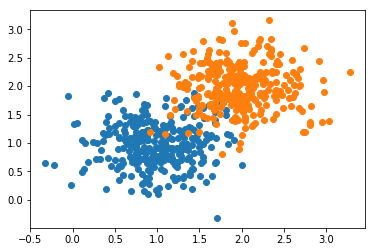

In [246]:
mean_1 = np.array([1,1])
mean_2 = np.array([2,2])
std = 0.4

N = 300
N_test = (int) (N * 2/3)

A_1 = np.random.normal(1, std, N)
A_2 = np.random.normal(1, std, N)
A = np.vstack((a_1, a_2, np.zeros(N)))
A_train = A[:, :N_test]
A_test = A[:, N_test:]

B_1 = np.random.normal(2, std, N)
B_2 = np.random.normal(2, std, N)
B = np.vstack((b_1, b_2, np.ones(N)))
B_train = B[:,:N_test]
B_test = B[:,N_test:]

data_train = np.vstack((A_train.T, B_train.T))
data_test = np.vstack((A_test.T, B_test.T))

X = np.array(data_train[:,:2])
Y = np.array(data_train[:,2])

X_test = np.array(data_test[:,:2])
Y_test = np.array(data_test[:,2])

plt.plot(A[0], A[1], 'o')
plt.plot(B[0], B[1], 'o')

X, mean_X, std_X = standardize(X)
X = np.column_stack((np.ones(X.shape[0]), X))
X_test, mean_X_test, std_X = standardize(X_test)

X_test = np.column_stack((np.ones(X_test.shape[0]), X_test))

### Class

### backprop

For MSE:

$ 
    \frac{\delta L}{a_n} = \frac{\delta (a_n - y)^2}{\delta a_{n}} = 2(a_n - y)  \\
    \frac{\delta a_{i}}{\delta z_{i}} = \frac{\delta S(z_{i})}{\delta z_{i}} = S(z_{i})(1 - S(z_{i})) \\ 
    \frac{\delta z_{i+1}}{\delta w_{i}} = \frac{\delta (a_{i} * w_{i} + b_{i})}{\delta w_{i}} = a_{i} \\
    \frac{\delta z_{i+1}}{\delta b_{i}} = \frac{\delta (a_{i} * w_{i} + b_{i})}{\delta b_{i}} = 1  \\
    \frac{\delta z_{i+1}}{\delta a_{i}} = \frac{\delta (a_{i} * w_{i} + b_{i})}{\delta a_{i}}= w_{i} $

In [349]:
class MLP:
    
    default_dim = np.array([2,10,5])
    
    def __init__(self, dimensions = default_dim, act_function = 'sigmoid'):
        
        # chooses the activation function to be applied
        if act_function == 'sigmoid':
            self.f = sigmoid
            self.gradient = sigmoid_gradient
        if act_function == 'relu':
            self.f = relu
            self.gradient = relu_gradient
    
        # number of layers of our MLP
        self.num_layers = dimensions.shape[0]
        
        # initialize the weights
        self.weights = {}
        self.bias = {}
        
        for n in np.arange(self.num_layers - 1):
            # the wights are initialized acccording to a normal distribution and divided by the size of the layer they're on
            self.weights[n + 1] = np.random.randn(dimensions[n + 1] * dimensions[n]).reshape(dimensions[n + 1], dimensions[n]) / np.sqrt(dimensions[n])
            # bias are all initialized to zero
            self.bias[n + 1] = np.zeros(dimensions[n + 1])
    
    # preforms the feed forward step
    def feed_forward(self, x):
        
        # keep track of all z and a to compute gradient in the backpropagation
        z = {}
        # the first layer is the input data
        a = {1:x}
        # We compute z[n+1] = a[n] * w[n] + b[n]
        # and a[n+1] = f(z[n+1]) = f(a[n] * x[n] + b[n]) where * is the inner product
        for n in np.arange(1, self.num_layers):
            z[n + 1] = self.weights[n] @ a[n] + self.bias[n]
            a[n + 1] = self.f(z[n + 1])

        return a, z
    
    # returns a prediction
    def predict(self, x):
        _, a = self.feed_forward(x)
        return a[self.num_layers]
    
    def back_propagate(self, a, z, y):
        
        weights_gradient = {}
        bias_gradient = {}
        
        # here we assumed we used mse as a loss
        nabla = 2 * (a[self.num_layers] - y)
        
        for n in np.flip(np.arange(1, self.num_layers)):
            nabla = nabla * self.gradient(z[n+1])
            weights_gradient[n] = np.outer(nabla, a[n])
            bias_gradient[n] = nabla
            nabla = nabla @ self.weights[n]
            
        self.gradient_descent_step(weights_gradient, bias_gradient)
            
    def gradient_descent_step(self, weights_gradient, bias_gradient):
        for n in np.arange(1, self.num_layers):
            self.weights[n] = self.weights[n] - self.lambda_ * weights_gradient[n]
            self.bias[n] = self.bias[n] - self.lambda_ * bias_gradient[n]
            
    
    def learn(self, x, y, max_iter, lambda_, batch_size, loss = 'mse'):
        self.lambda_ = lambda_

        indices = np.arange(x.shape[0])
        
        for i in np.arange(max_iter):
            np.random.shuffle(indices)
            x = x[indices]
            y = y[indices]
            
            for j in np.arange(batch_size):
                x_ = x[j]
                y_ = y[j]
                a, z = self.feed_forward(x_)
                self.back_propagate(a, z, y_)
            
            y_pred = self.predict(x_)


In [388]:
mlp_test = MLP(dimensions = np.array([3,5,1]))

In [389]:
mlp_test.learn(X, Y, 100, 0.5, 1)

In [390]:
pred = []
for x in X:
    p = mlp_test.predict(x)
    pred.append(p)
pred = np.array(pred).flatten()

In [394]:
np.sum(np.abs(np.where(pred < 1/2, 0, 1) - Y)) / 400 * 100

6.25